## Project 1
Income shocks and Intra-household Gender Norms

### Abstract
For my thesis I am looking at the effect of income shocks and attitudes towards domestic violence amongst women in Indonesia. I will be using local fishing conditions as a proxy for income, and will use it to see the effect of poor conditions on the percentage of women who state that intimate partner violence is ok. 

My main treatment variable is fishshare50 which is the share of good fishing spots within 50 nautical miles of each coastal district that the household is located in.
My preferred specification is bad_fishingax which is equal to one if fishshare50 is below the sample median.

My main outcome variable is violence_justified, which is a dummy variable equal to one if the respondent states that it is ok for a husband to beat their wives in the following situations: Arguing with the husband, neglecting the children, going out without telling the husband, refuses sex, and burning the food.

The following is my exploratory data analysis, and my write up that summarizes my findings.

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [4]:
DHS=pd.read_stata('/Users/mkrupoff/Dropbox/Thesis/Data/Cleaned_DHS/In_DHS_analysis.dta')
fish=pd.read_stata('/Users/mkrupoff/Dropbox/Thesis/Data/Cleaned_DHS/axbard_clean2.dta')

In [5]:
DHS.describe()

/Users/mkrupoff/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,clusterid,v002,v003,v004,v005,month,year,v008,v009,v010,...,poor_ag,poor_ag_rural,beat_argues,beat_goes_out_wo_telling,beat_neglects_children,beat_refuses_sex,beat_burns_food,vio_seasonal,bfish_seasonal,vio_seasonal_w
count,6.604100e+04,66041.000000,66041.000000,66041.000000,6.604100e+04,66041.000000,66041.000000,66041.000000,66041.000000,66041.000000,...,66041.000000,66041.000000,66014.000000,66021.000000,66021.000000,66016.000000,66019.000000,6.601500e+04,6.604100e+04,66015.000000
mean,2.712867e+07,12.940794,2.548932,951.790479,9.546707e+05,6.736028,2007.860962,1301.061068,6.297285,1974.844566,...,0.237474,0.216517,0.089617,0.259115,0.279820,0.093538,0.044730,-6.871621e-07,6.732398e-07,-0.002789
std,2.905998e+07,7.197879,1.387483,499.912258,1.196219e+06,2.744045,3.954714,46.520888,3.387167,10.248883,...,0.425482,0.411891,0.285589,0.438270,0.448794,0.291245,0.206659,4.605907e-01,4.407881e-01,0.460796
min,1.000000e+00,1.000000,1.000000,1.000000,2.187200e+04,1.000000,2002.000000,1234.000000,1.000000,1952.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.511708e-01,-9.805381e-01,-0.665094
25%,1.147000e+03,7.000000,2.000000,523.000000,2.670180e+05,5.000000,2003.000000,1239.000000,3.000000,1967.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-3.366895e-01,NaN
50%,1.771151e+07,13.000000,2.000000,1006.000000,5.107370e+05,6.000000,2007.000000,1292.000000,6.000000,1975.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.126761e-01,NaN
75%,5.203152e+07,19.000000,2.000000,1389.000000,9.580680e+05,8.000000,2012.000000,1349.000000,9.000000,1982.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.856613e-01,NaN
max,9.471516e+07,36.000000,30.000000,1832.000000,1.200649e+07,12.000000,2012.000000,1352.000000,12.000000,1997.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.829225e-01,8.873239e-01,0.881920


In [6]:

columns=['v744a','v744b','v744c', 'v744d', 'v744e']
new_names=['beat_goes_out_cat', 'beat_neglects_children_cat', 'beat_argues_w_husb_cat', 'beat_refuses_sex_cat', 'beat_burns_food_cat']

for i in range(0,len(columns)):
    DHS.rename(columns={columns[i]:new_names[i]}, inplace=True)

    

In [7]:
DHS['beat_argues'].describe()

count    66014.000000
mean         0.089617
std          0.285589
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max          1.000000
Name: beat_argues, dtype: float64

In [113]:
def rename_treatments(var):
    DHS[var]=DHS[var].apply(lambda x: 1 if x =='yes' else 0 if x=='no' else 0 if x=="don't know" else np.nan if x==9 else x)
    return DHS[var]

for variables in DHS[['beat_neglects_children_cat','beat_refuses_sex_cat','beat_goes_out_cat', 'beat_argues_w_husb_cat', 'beat_burns_food_cat']]:
    rename_treatments(variables)



In [9]:
DHS['beat_refuses_sex'].mean()


0.09353792667388916

In [10]:
DHS[['beat_neglects_children_cat','beat_goes_out_cat', 'beat_argues_w_husb_cat', 'beat_refuses_sex_cat', 'beat_burns_food_cat']].isnull().sum()





beat_neglects_children_cat    20
beat_goes_out_cat             20
beat_argues_w_husb_cat        27
beat_refuses_sex_cat          25
beat_burns_food_cat           22
dtype: int64

In [11]:
att_neg_children=DHS['beat_neglects_children'].groupby(DHS['province']).mean()
att_neg_children


province
aceh                         0.365197
bali                         0.173970
banten                       0.197637
bengkulu                     0.387515
d i yogyakarta               0.119124
dki jakarta                  0.092430
gorontalo                    0.233172
jambi                        0.201389
jawa barat                   0.217174
jawa tengah                  0.182253
jawa timur                   0.243251
kalimantan barat             0.218590
kalimantan selatan           0.362273
kalimantan tengah            0.387454
kalimantan timur             0.190556
kepulauan bangka belitung    0.373248
kepulauan riau               0.317886
lampung                      0.279896
maluku                       0.376586
maluku utara                 0.388585
nusa tenggara barat          0.566609
nusa tenggara timur          0.349577
papua                        0.204942
papua barat                  0.278526
riau                         0.335146
sulawesi barat               0.334825
sul

In [114]:
DHS[['beat_argues','beat_goes_out_wo_telling','beat_neglects_children','beat_refuses_sex','beat_burns_food']].mean()



beat_argues                 0.089617
beat_goes_out_wo_telling    0.259115
beat_neglects_children      0.279820
beat_refuses_sex            0.093538
beat_burns_food             0.044730
dtype: float32

In [12]:
# fish_prov=DHS['violence_justified'].groupby(DHS['province']).mean()

# fish_prov
DHS.groupby(['province' ,'month'])[['beat_argues','beat_goes_out_wo_telling','beat_neglects_children','beat_refuses_sex','beat_burns_food']].mean()



beat_argues  beat_goes_out_wo_telling  \
province          month                                          
aceh              5.0       0.097561                  0.333333   
                  6.0       0.101110                  0.406905   
                  7.0       0.155738                  0.377049   
                  8.0       0.133700                  0.380952   
                  9.0       0.181818                  0.363636   
bali              5.0       0.076401                  0.198642   
                  6.0       0.060395                  0.154472   
                  7.0       0.075843                  0.175562   
                  8.0       0.046404                  0.118329   
                  10.0      0.230089                  0.283186   
                  11.0      0.134868                  0.154605   
                  12.0      0.093447                  0.114078   
banten            3.0       0.055182                  0.114401   
                  4.0       0.052448                  0.152098   
                  5.0       0.047677                  0.228606   
                  6.0       0.041806                  0.230769   
                  7.0       0.044048                  0.235714   
                  8.0       0.052414                  0.195862   
                  9.0       0.000000                  0.050000   
bengkulu          1.0       0.218085                  0.505319   
                  5.0       0.060000                  0.252000   
                  6.0       0.023179                  0.205298   
                  7.0       0.179211                  0.383513   
                  8.0       0.106122                  0.400000   
                  10.0      0.090909                  0.295455   
                  11.0      0.038462                  0.346154   
                  12.0      0.228155                  0.432039   
d i yogyakarta    1.0       0.022222                  0.022222   
                  5.0       0.011811                  0.125984   
                  7.0       0.012776                  0.085947   
...                              ...                       ...   
sulawesi tenggara 10.0      0.060000                  0.200000   
                  11.0      0.041667                  0.625000   
                  12.0      0.039735                  0.399007   
sulawesi utara    5.0       0.020710                  0.139053   
                  6.0       0.047930                  0.161220   
                  7.0       0.162921                  0.252809   
                  8.0       0.043077                  0.073846   
                  10.0      0.067308                  0.173077   
                  11.0      0.036115                  0.077210   
                  12.0      0.000000                  0.000000   
sumatera barat    1.0       0.102941                  0.308824   
                  5.0       0.048101                  0.154430   
                  6.0       0.020270                  0.162162   
                  7.0       0.041026                  0.225641   
                  8.0       0.039604                  0.366337   
                  10.0      0.027778                  0.305556   
                  11.0      0.122449                  0.204082   
                  12.0      0.080882                  0.367647   
sumatera selatan  1.0       0.000000                  0.022222   
                  6.0       0.092937                  0.289963   
                  8.0       0.175676                  0.459459   
                  9.0       0.116279                  0.372093   
                  12.0      0.107527                  0.064516   
sumatera utara    1.0       0.032573                  0.123778   
                  5.0       0.057778                  0.200000   
                  6.0       0.030981                  0.179002   
                  7.0       0.169533                  0.348894   
                  8.0       0.124352                  0.310881   

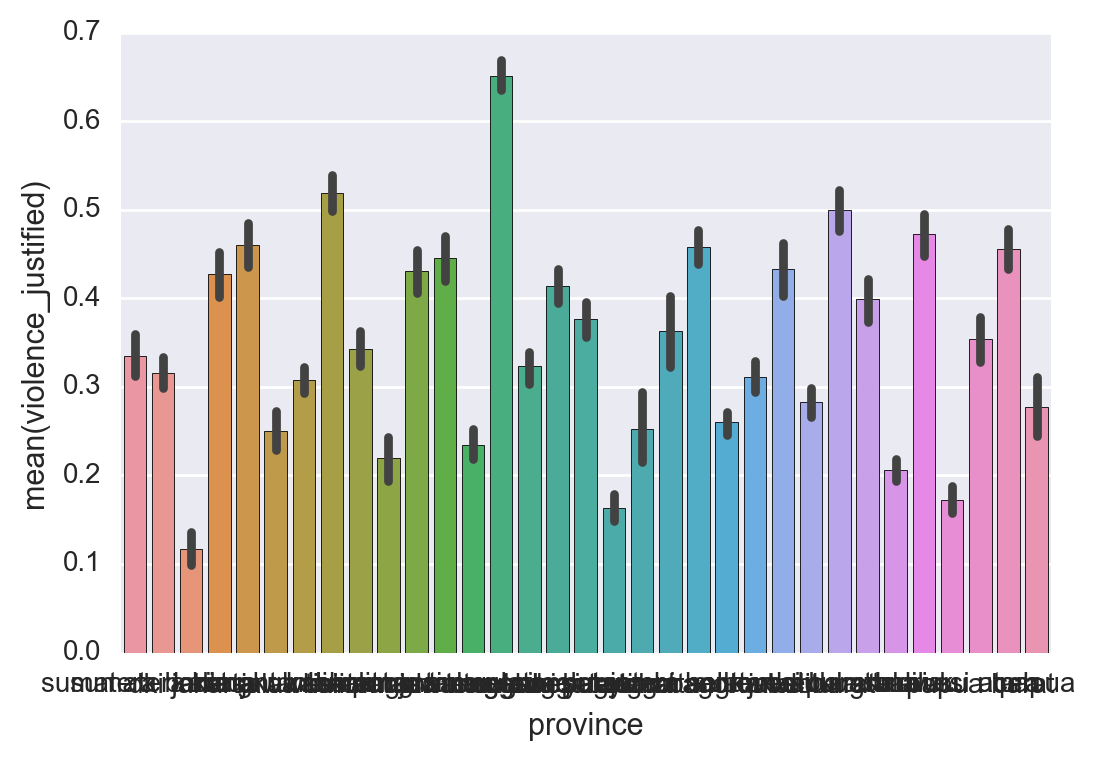

In [13]:
#Figure 1
sns.barplot(x="province", y="violence_justified", data=DHS)

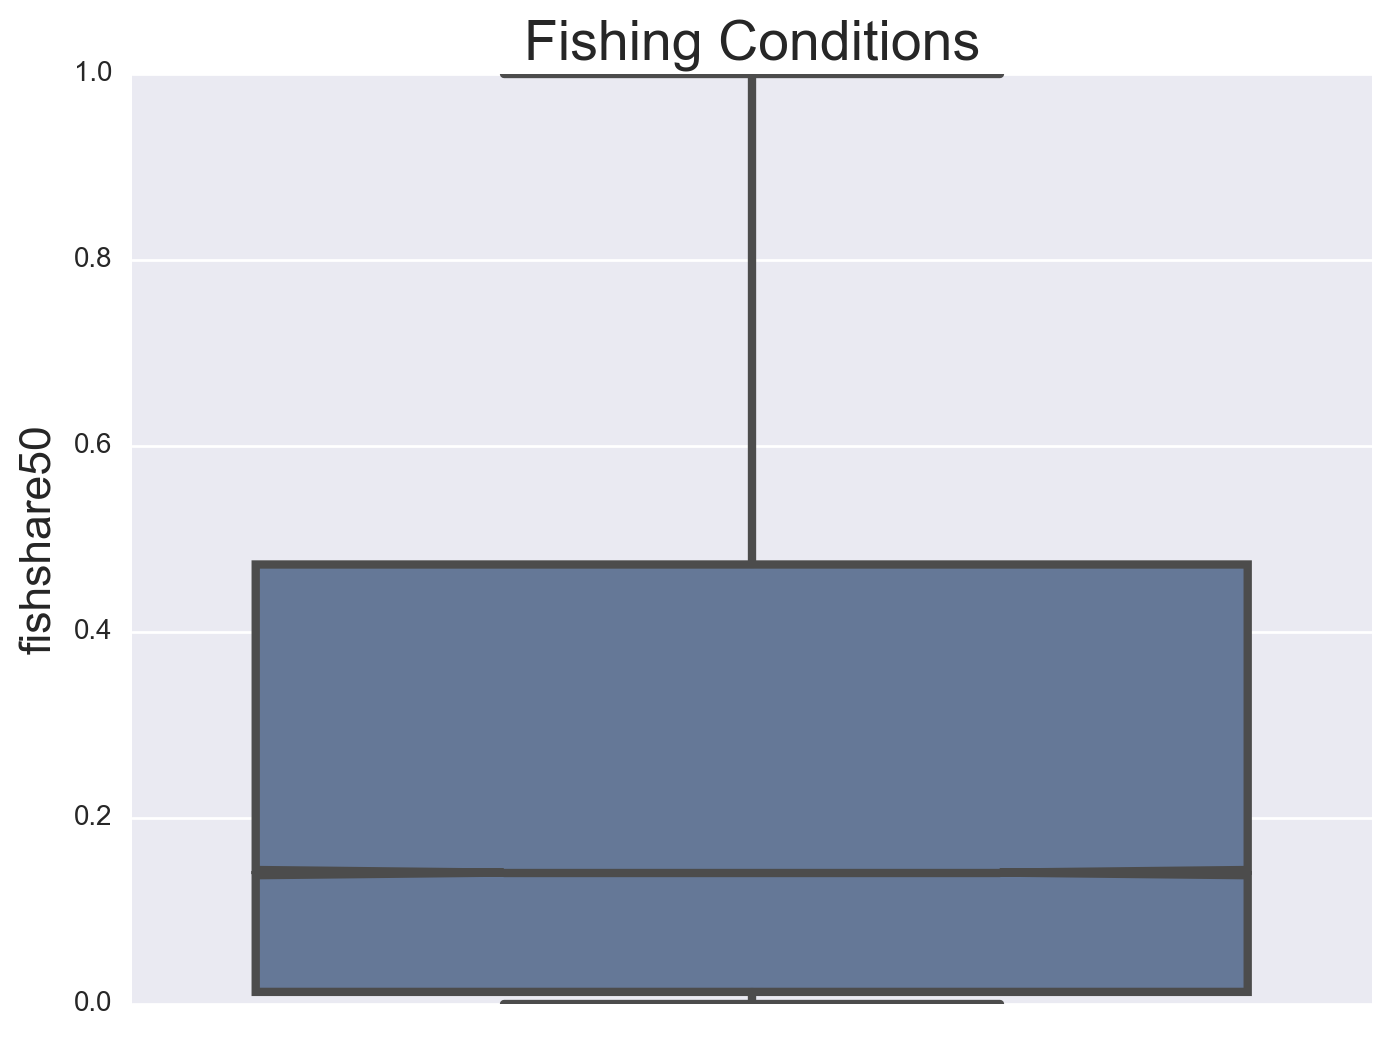

In [15]:
def boxplotter(data,title, ytitle):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    sns.boxplot(data, orient='v',
                fliersize=5, linewidth=3, notch=True, 
                saturation=0.5, ax=ax)
    ax.set_ylabel(ytitle, fontsize=16)
    ax.set_title(title, fontsize=20)
boxplotter(DHS.fishshare50, "Fishing Conditions", "fishshare50")
plt.show()

In [17]:
DHS.groupby(['province' ,'month'])[['violence_justified', 'fishshare50']].mean()

violence_justified  fishshare50
province          month                                 
aceh              5.0              0.439024     0.039999
                  6.0              0.478422     0.018617
                  7.0              0.450820     0.073251
                  8.0              0.432234     0.031897
                  9.0              0.409091     0.025240
bali              5.0              0.292020     0.545570
                  6.0              0.217189     0.479608
                  7.0              0.231742     0.216903
                  8.0              0.143852     0.054808
                  10.0             0.362832     0.233041
                  11.0             0.177632     0.493134
                  12.0             0.131068     0.093036
banten            3.0              0.148048     0.225979
                  4.0              0.178322     0.005736
                  5.0              0.343521     0.029079
                  6.0              0.341137     0.294845
                  7.0              0.305952     0.883156
                  8.0              0.228966     0.859374
                  9.0              0.050000     0.878020
bengkulu          1.0              0.617021     0.000000
                  5.0              0.340000     0.000000
                  6.0              0.271523     0.000018
                  7.0              0.516129     0.213569
                  8.0              0.530612     0.422389
                  10.0             0.409091     0.205128
                  11.0             0.480769     0.327434
                  12.0             0.577670     0.010418
d i yogyakarta    1.0              0.066667     0.155521
                  5.0              0.181102     0.421953
                  7.0              0.135889     0.289168
...                                     ...          ...
sulawesi tenggara 10.0             0.280000     0.083140
                  11.0             0.625000     0.029332
                  12.0             0.483444     0.000000
sulawesi utara    5.0              0.207101     0.000727
                  6.0              0.215686     0.116160
                  7.0              0.325843     0.166795
                  8.0              0.098462     0.220660
                  10.0             0.298077     0.063010
                  11.0             0.117061     0.006498
                  12.0             0.000000     0.013378
sumatera barat    1.0              0.389706     0.000000
                  5.0              0.283544     0.000066
                  6.0              0.246622     0.000424
                  7.0              0.317949     0.007251
                  8.0              0.425743     0.050229
                  10.0             0.430556     0.000000
                  11.0             0.306122     0.225262
                  12.0             0.485294     0.021406
sumatera selatan  1.0              0.133333     0.488203
                  6.0              0.360595     0.034079
                  8.0              0.621622     0.591497
                  9.0              0.651163     0.507659
                  12.0             0.139785     0.020531
sumatera utara    1.0              0.260586     0.481644
                  5.0              0.286667     0.045819
                  6.0              0.299484     0.001162
                  7.0              0.457002     0.019770
                  8.0              0.409326     0.006774
                  11.0             0.086331     0.098714
                  12.0             0.307071     0.355556

[240 rows x 2 columns]

In [16]:
DHS.groupby(['province' ,'month'])[['violence_justified', 'bad_fishingax']].mean()

violence_justified  bad_fishingax
province          month                                   
aceh              5.0              0.439024       1.000000
                  6.0              0.478422       1.000000
                  7.0              0.450820       0.721311
                  8.0              0.432234       1.000000
                  9.0              0.409091       1.000000
bali              5.0              0.292020       0.000000
                  6.0              0.217189       0.000000
                  7.0              0.231742       0.001404
                  8.0              0.143852       1.000000
                  10.0             0.362832       0.000000
                  11.0             0.177632       0.000000
                  12.0             0.131068       1.000000
banten            3.0              0.148048       0.000000
                  4.0              0.178322       1.000000
                  5.0              0.343521       1.000000
                  6.0              0.341137       0.000000
                  7.0              0.305952       0.000000
                  8.0              0.228966       0.000000
                  9.0              0.050000       0.000000
bengkulu          1.0              0.617021       1.000000
                  5.0              0.340000       1.000000
                  6.0              0.271523       1.000000
                  7.0              0.516129       0.172043
                  8.0              0.530612       0.000000
                  10.0             0.409091       0.000000
                  11.0             0.480769       0.000000
                  12.0             0.577670       1.000000
d i yogyakarta    1.0              0.066667       0.000000
                  5.0              0.181102       0.000000
                  7.0              0.135889       0.445993
...                                     ...            ...
sulawesi tenggara 10.0             0.280000       0.990000
                  11.0             0.625000       1.000000
                  12.0             0.483444       1.000000
sulawesi utara    5.0              0.207101       1.000000
                  6.0              0.215686       0.735358
                  7.0              0.325843       0.387640
                  8.0              0.098462       0.058462
                  10.0             0.298077       1.000000
                  11.0             0.117061       1.000000
                  12.0             0.000000       1.000000
sumatera barat    1.0              0.389706       1.000000
                  5.0              0.283544       1.000000
                  6.0              0.246622       1.000000
                  7.0              0.317949       1.000000
                  8.0              0.425743       1.000000
                  10.0             0.430556       1.000000
                  11.0             0.306122       0.346939
                  12.0             0.485294       1.000000
sumatera selatan  1.0              0.133333       0.000000
                  6.0              0.360595       1.000000
                  8.0              0.621622       0.000000
                  9.0              0.651163       0.000000
                  12.0             0.139785       1.000000
sumatera utara    1.0              0.260586       0.000000
                  5.0              0.286667       1.000000
                  6.0              0.299484       1.000000
                  7.0              0.457002       1.000000
                  8.0              0.409326       1.000000
                  11.0             0.086331       0.812950
                  12.0             0.307071       0.246465

[240 rows x 2 columns]

[ 0.          0.37724552  0.92203391 ...,  0.19208211  0.19208211
  0.01497006]
fish mean: 0.270002
fish std: 0.293679


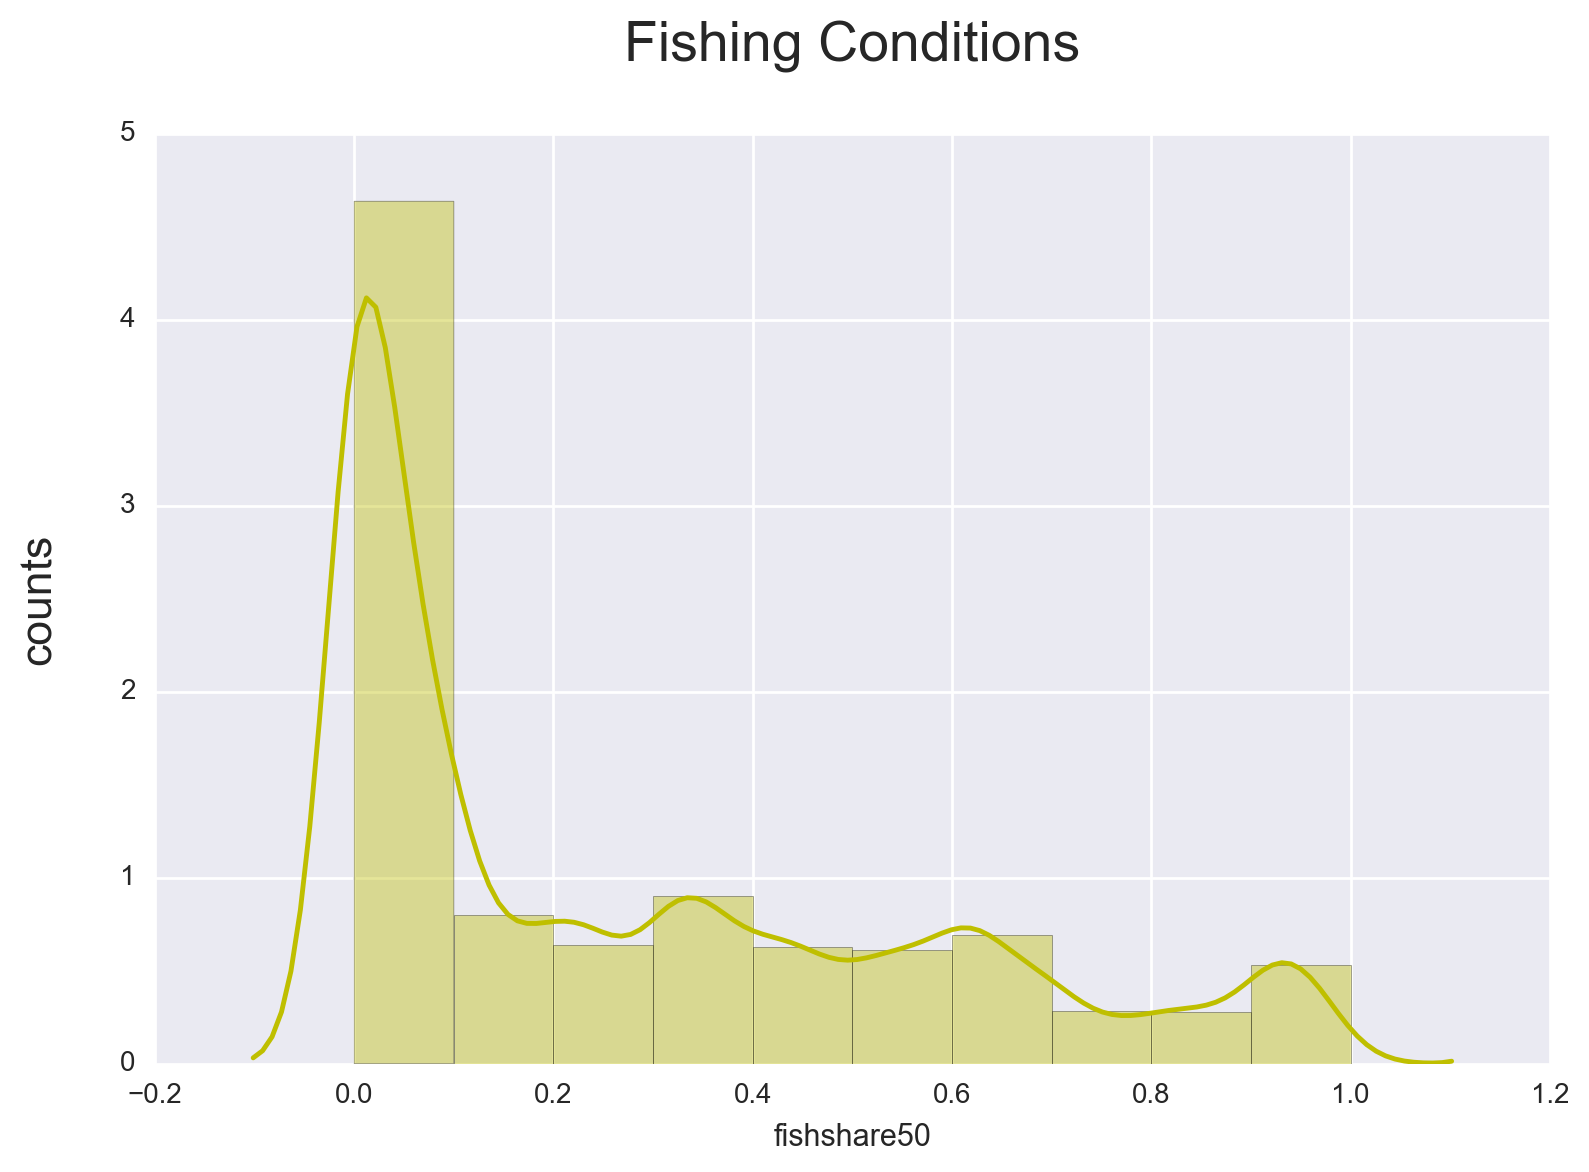

In [18]:
fishshare50 = DHS.fishshare50.values
print fishshare50
fish_mean = np.mean(fishshare50)
fish_std = np.std(fishshare50)

print 'fish mean:', fish_mean
print 'fish std:', fish_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(DHS['fishshare50'], bins=10, hist=True, kde=True,color='y',
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Fishing Conditions\n', fontsize=20)

plt.show()

In [112]:
# def decode_variables(var):
#     DHS[var]=DHS[var].apply(lambda x: 1 if x =='yes' else 0 if x=='no' else 0 if x=="don't know" else np.nan if x==9 else x)
#     return DHS[var]

# for variables in DHS[['beat_goes_out' ,'beat_neglects_children' ,'beat_argues_w_husb', 'beat_refuses_sex', 'beat_burns_food']]:
#     decode_variables(variables)

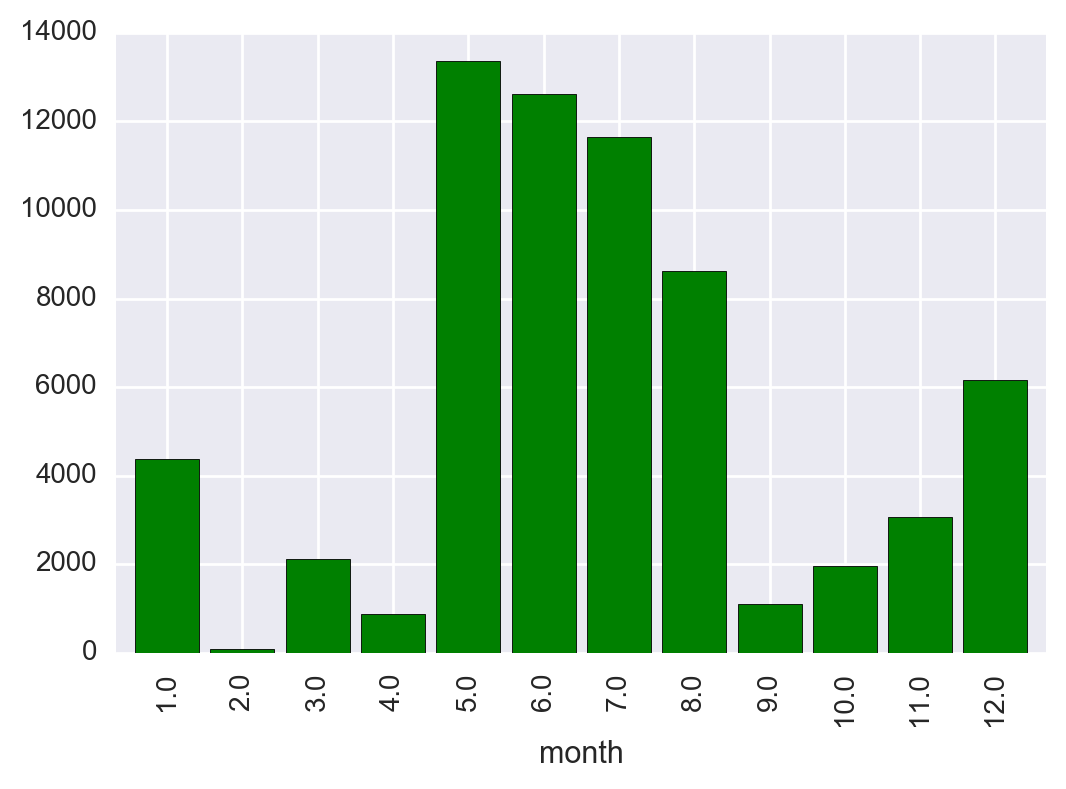

In [21]:
DHS.groupby("month").size().plot(kind="bar", color="g", width=0.85)
plt.show()

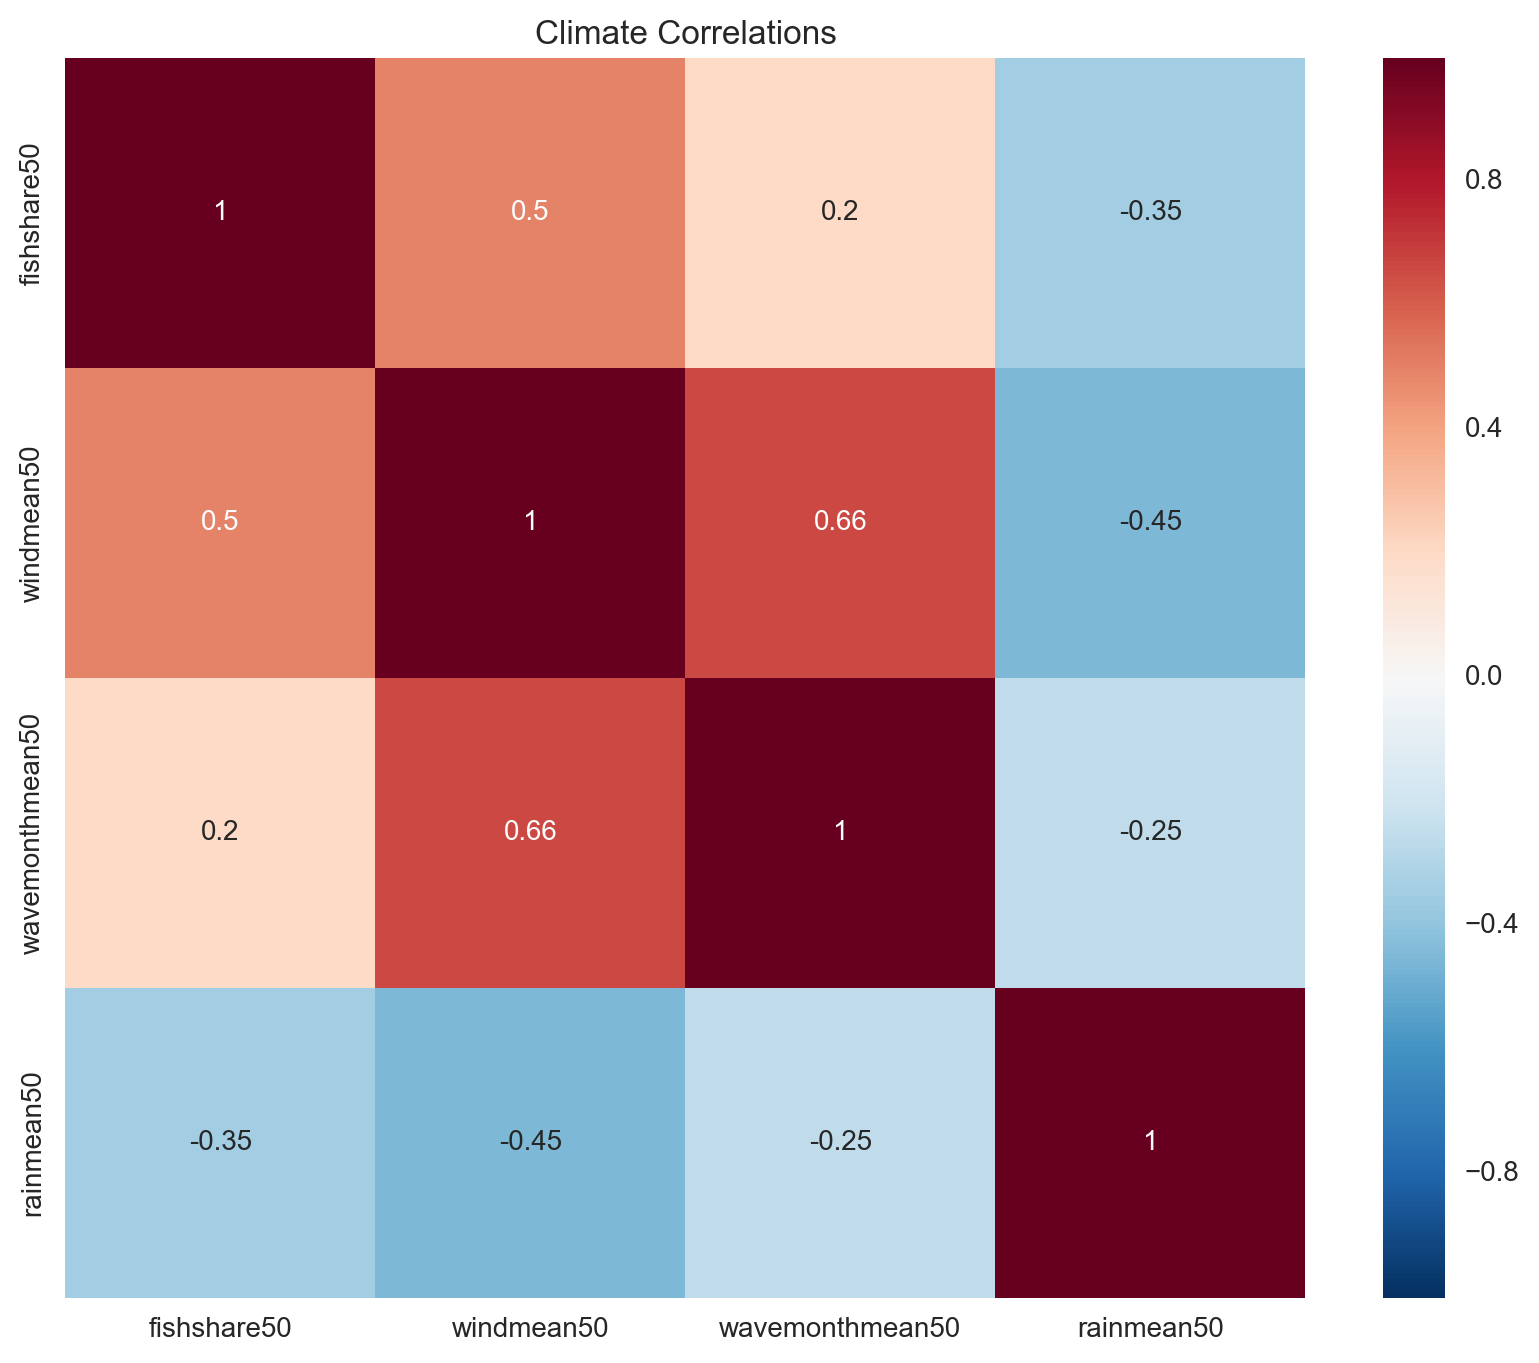

In [33]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title("Climate Correlations")
sns.heatmap(DHS[['fishshare50','windmean50','wavemonthmean50','rainmean50']].corr(),annot=True, ax=ax)
plt.show()
#DHS[['fishshare50','beat_goes_out' ,'beat_neglects_children', 'beat_argues_w_husb', 'beat_refuses_sex', 'beat_burns_food', 'violence_justified']].corr()

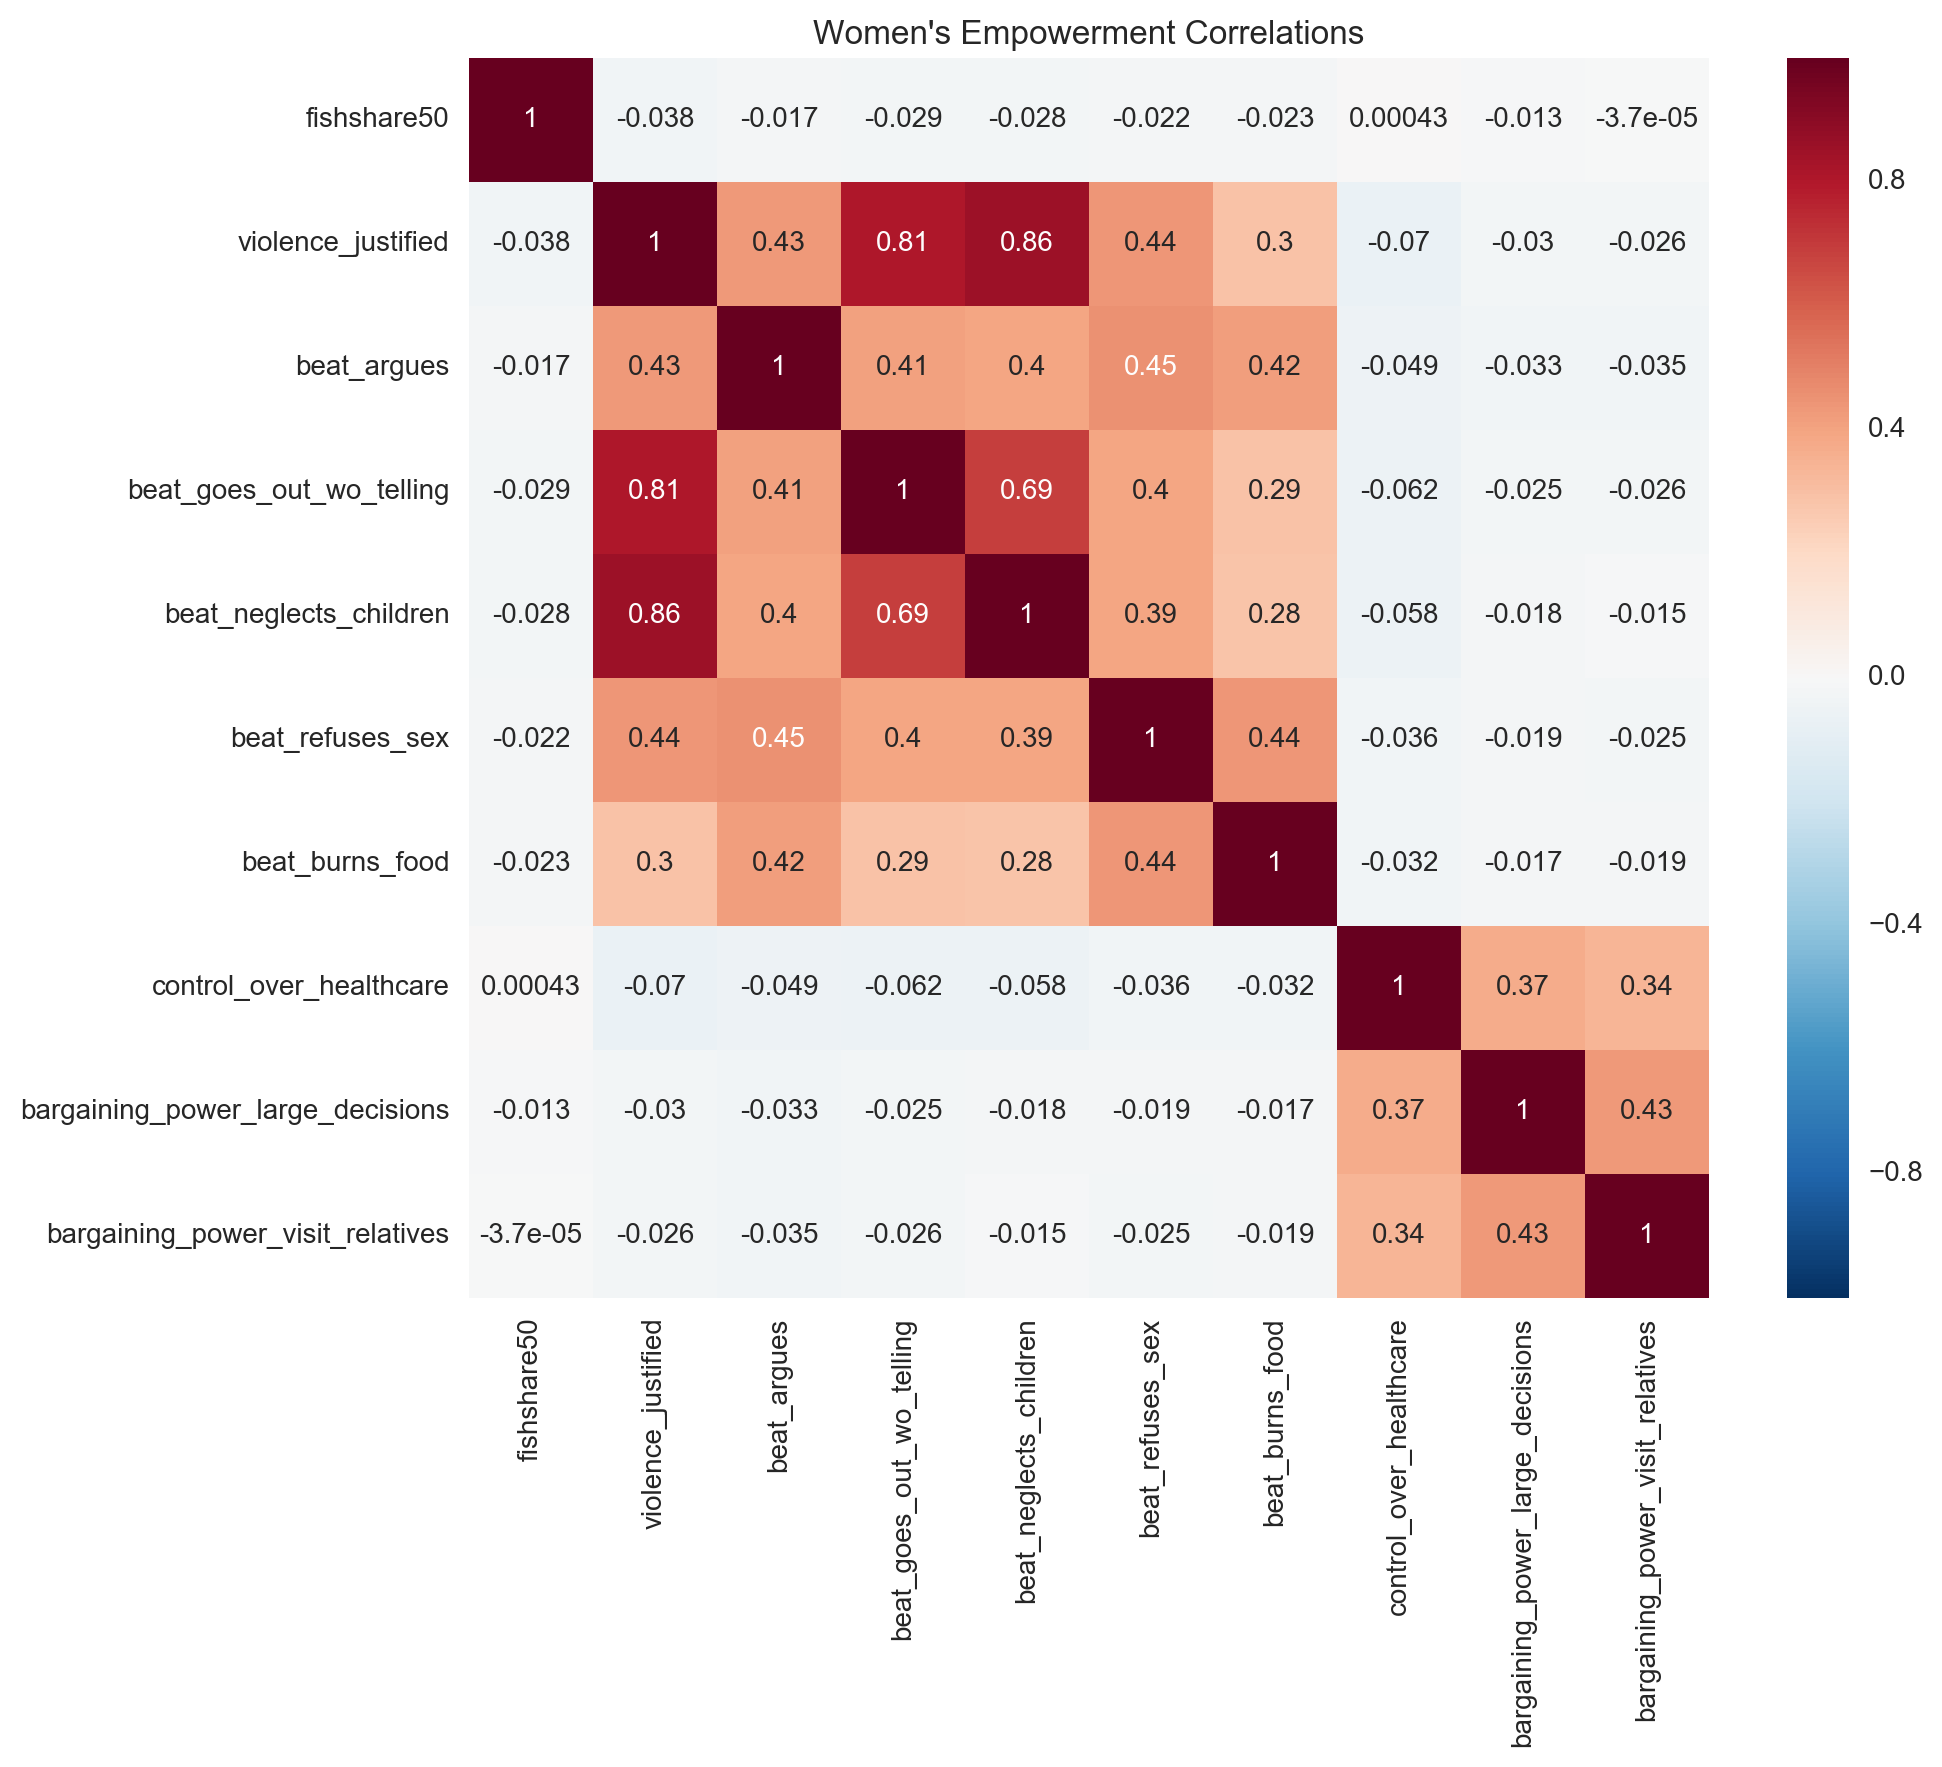

In [116]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title("Women's Empowerment Correlations")
sns.heatmap(DHS[['fishshare50','violence_justified','beat_argues','beat_goes_out_wo_telling','beat_neglects_children','beat_refuses_sex','beat_burns_food','control_over_healthcare','bargaining_power_large_decisions','bargaining_power_visit_relatives']].corr(),annot=True, ax=ax)
plt.show()

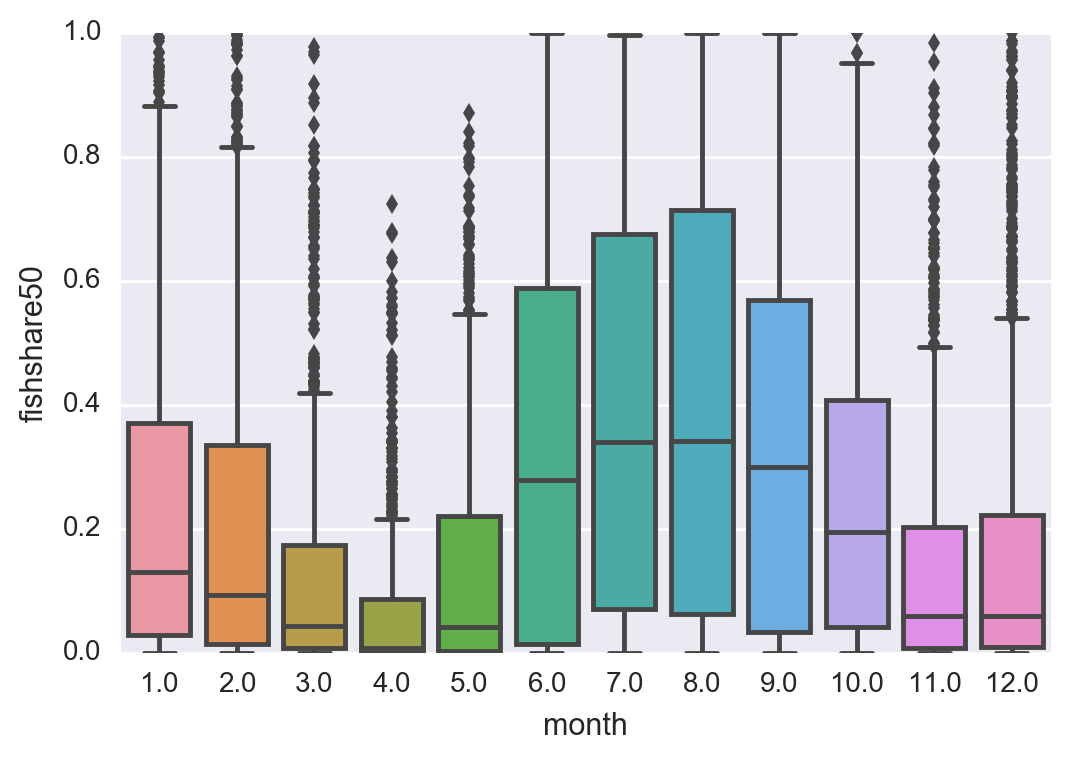

In [111]:
def group_box(data, xvar, yvar):
    sns.boxplot(x=xvar, y=yvar, data=data);
    
group_box(fish, 'month', 'fishshare50')


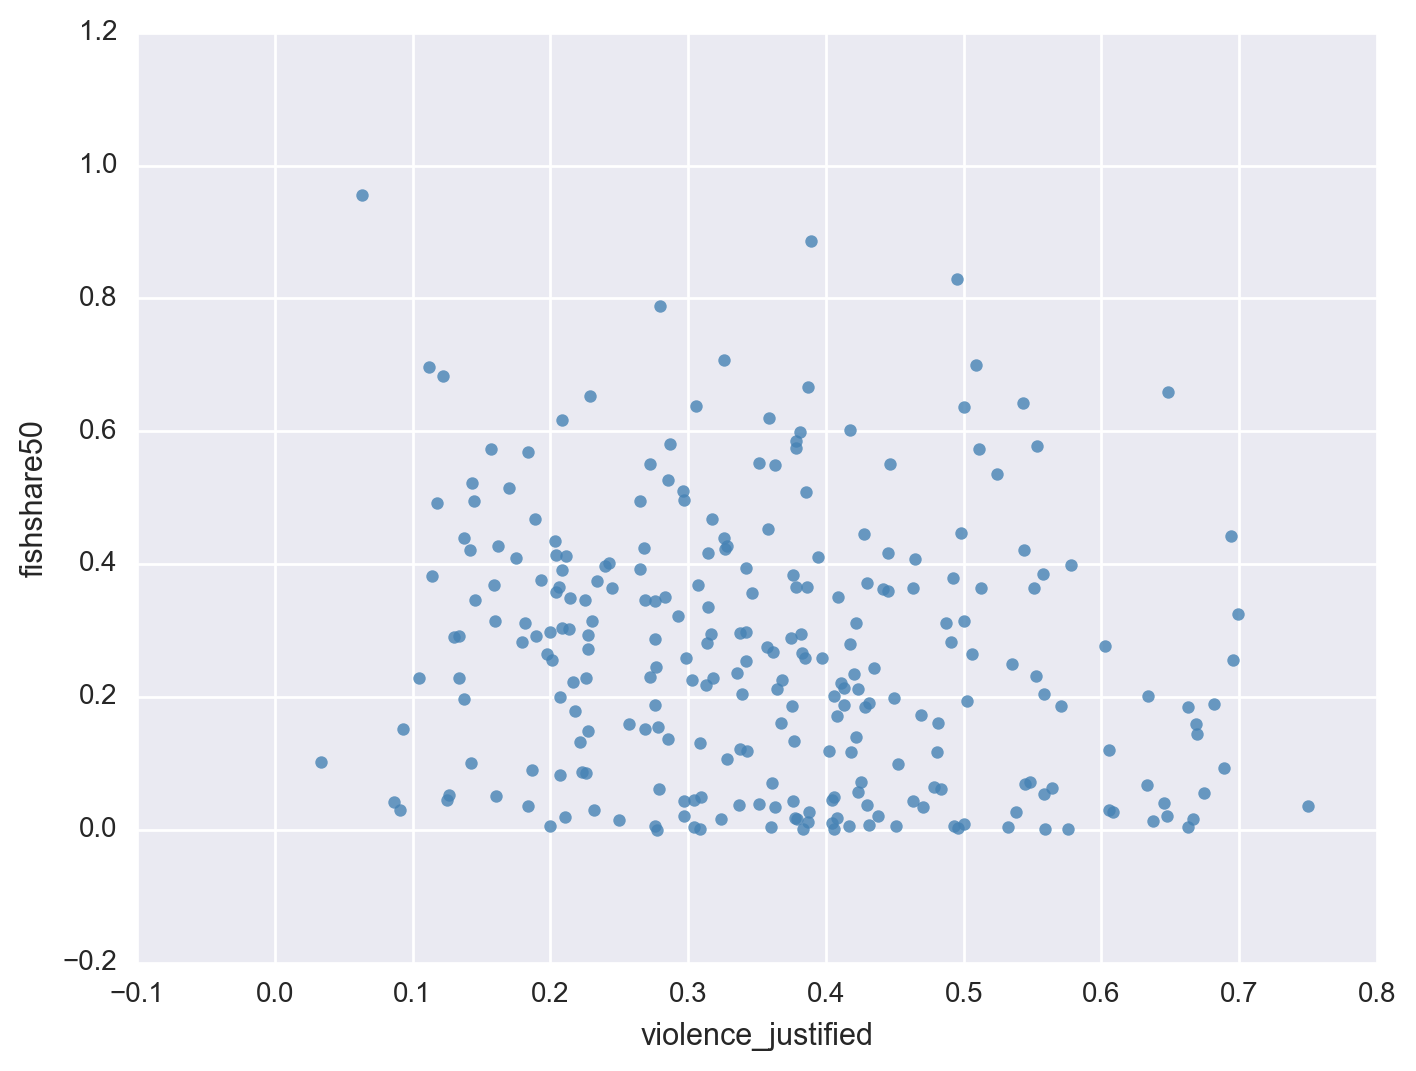

In [40]:
violence_district=DHS.groupby(DHS['master_kabkey'])['violence_justified'].mean()
fishshare=DHS.groupby(DHS['master_kabkey'])['fishshare50'].mean()

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax = sns.regplot(violence_district, fishshare, fit_reg=False, color='steelblue', ax=ax)
plt.show()



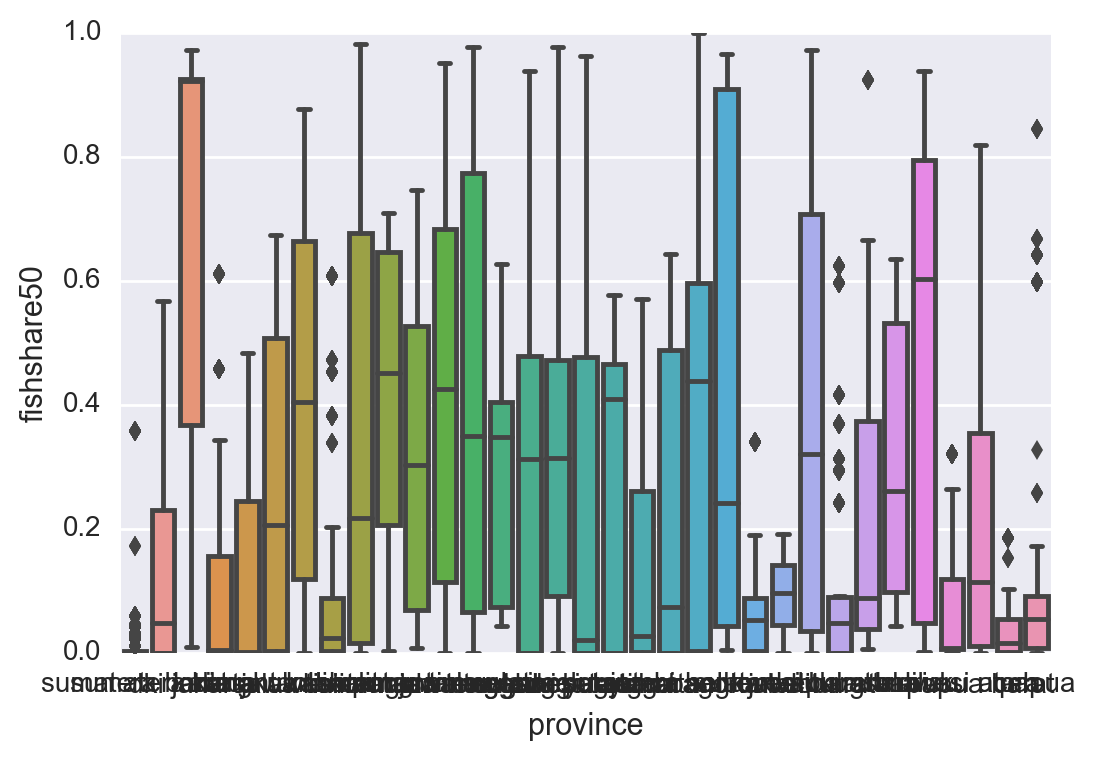

In [110]:
group_box(DHS, 'province', 'fishshare50')



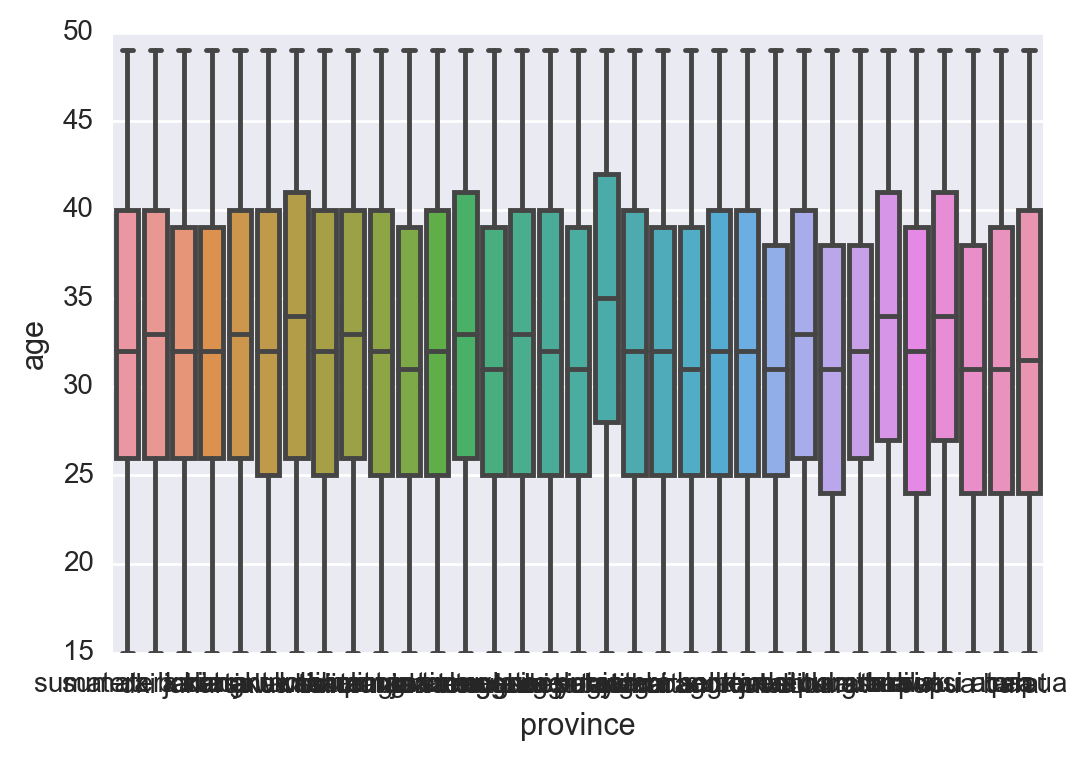

In [43]:
sns.boxplot(x="province", y="age", data=DHS);



In [25]:
def barplots(x_var,y_var,cat,data):
    sns.barplot(x="month", y="violence_justified",hue="poor_hh", data=DHS);

In [50]:
def barplots_cat(x_var,y_var,cat,data,xlabel,ylabel,title):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    sns.barplot(x=x_var, y=y_var,hue=cat, data=data, ax=ax);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=20)
def barplot(x_var,y_var,data,xlabel,ylabel,title, color):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    sns.barplot(x=x_var, y=y_var, data=data, ax=ax,palette=color);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=20)



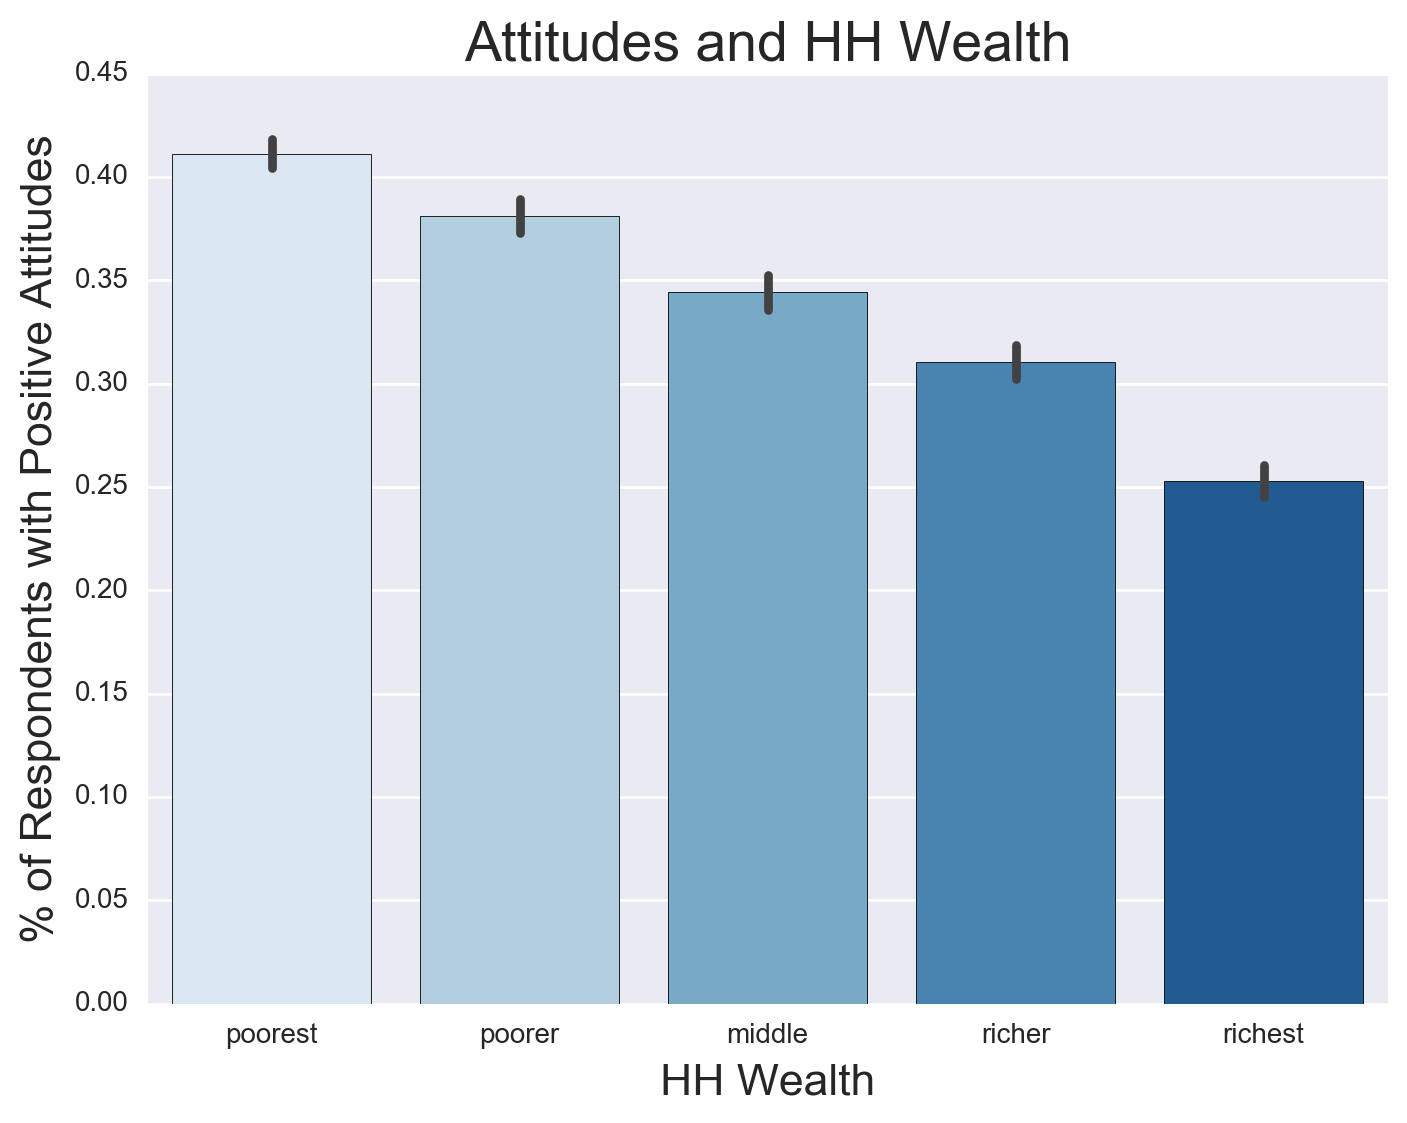

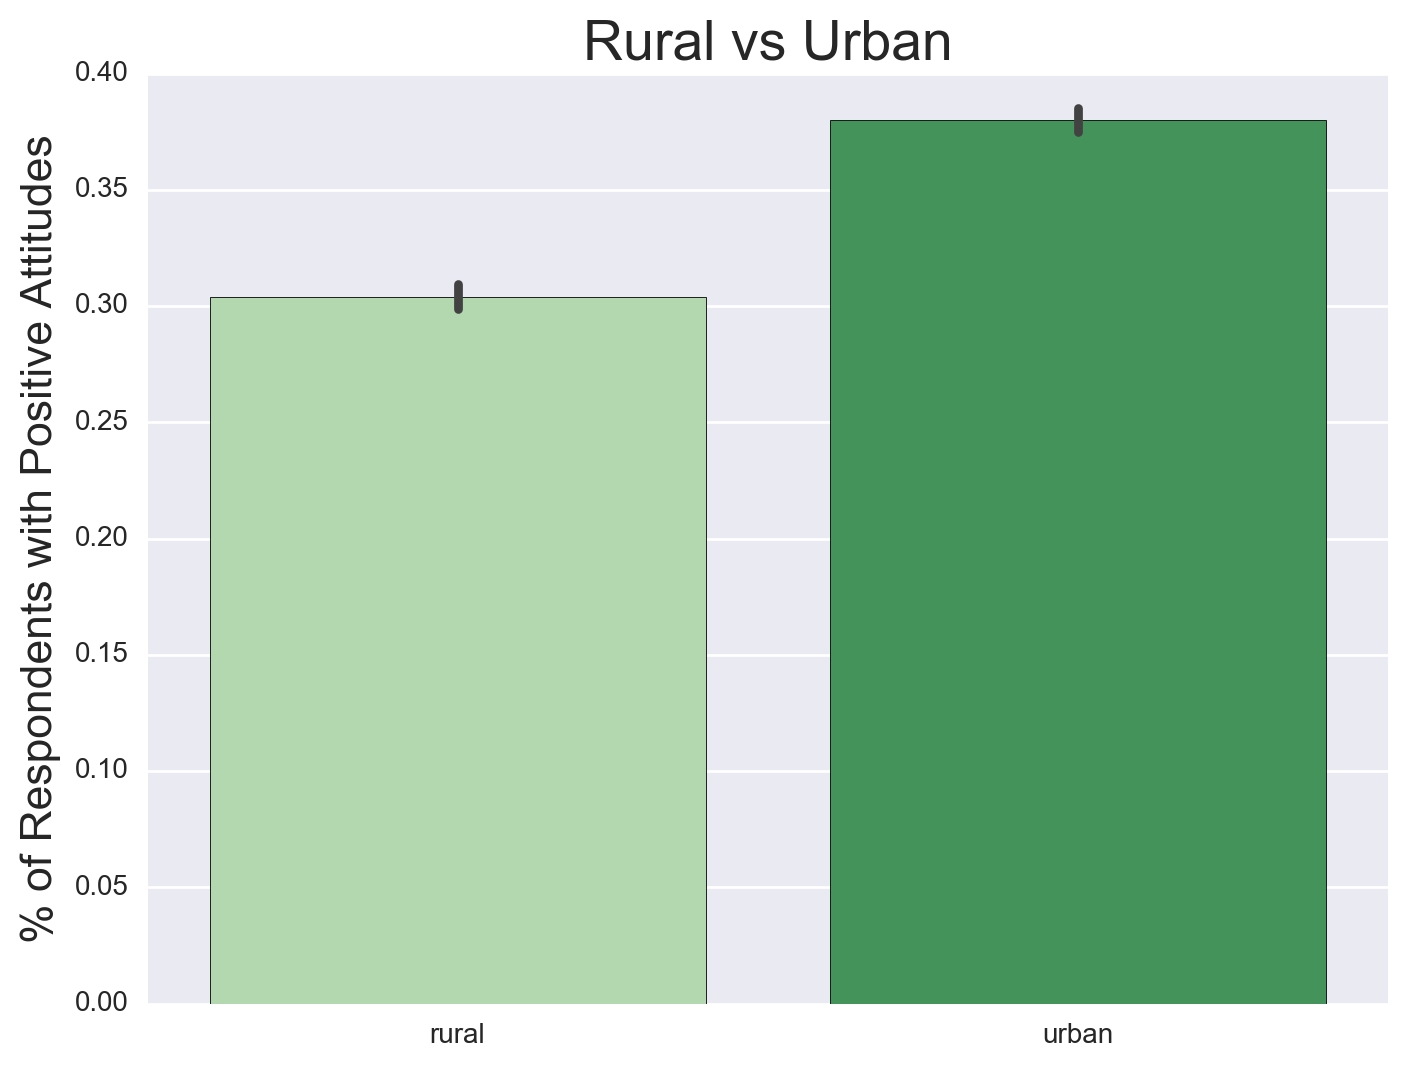

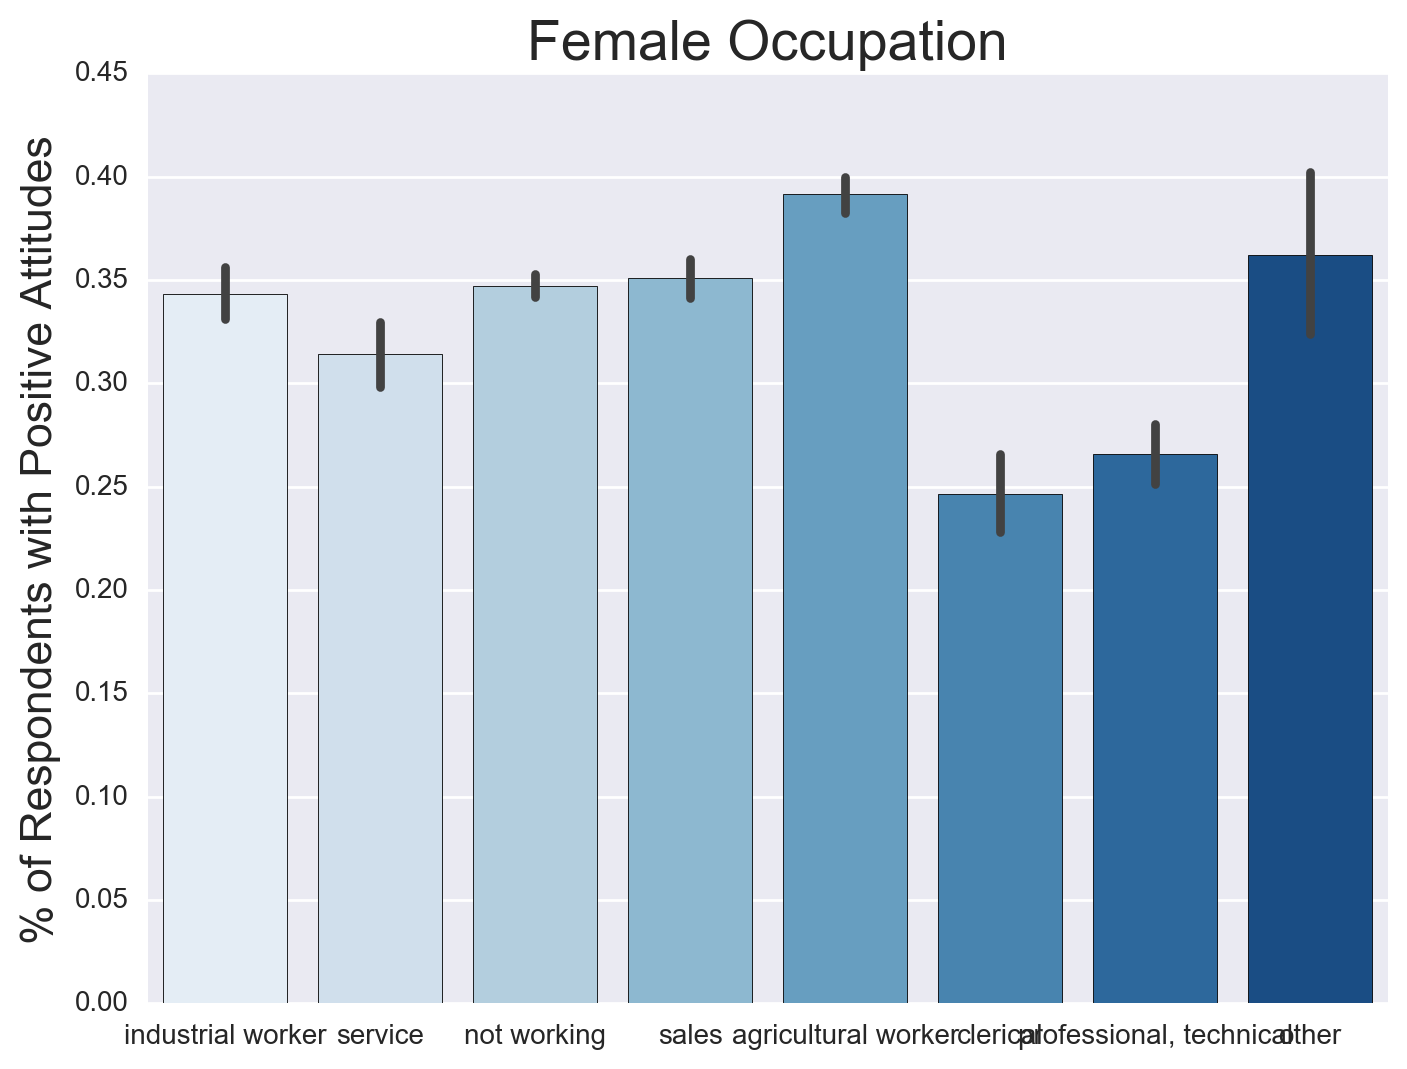

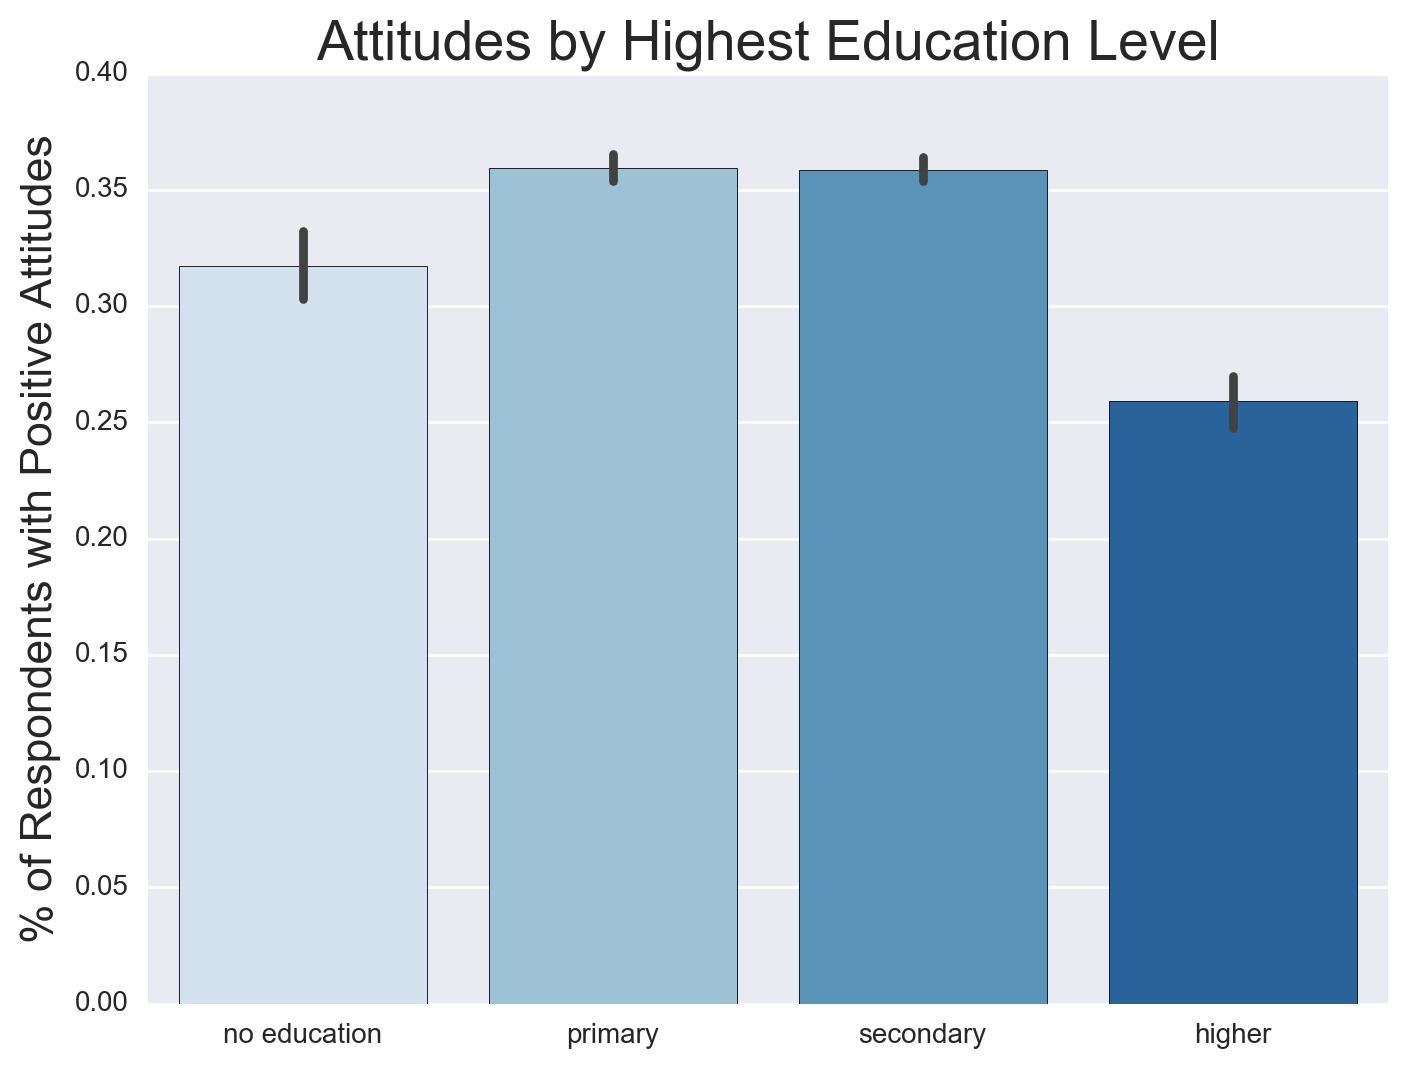

In [105]:
barplot('wealth','violence_justified',DHS,'HH Wealth','% of Respondents with Positive Attitudes','Attitudes and HH Wealth','Blues')
#sns.barplot(x="poor_hh", y="violence_justified", data=DHS);

DHS['rural']=DHS['rural'].apply(lambda x: 'rural' if x ==0 else x)
barplot('rural','violence_justified',DHS,'','% of Respondents with Positive Attitudes','Rural vs Urban', 'Greens')
barplot('fem_occupation','violence_justified',DHS,'','% of Respondents with Positive Attitudes','Female Occupation','Blues')
barplot('education_level','violence_justified',DHS,'','% of Respondents with Positive Attitudes','Attitudes by Highest Education Level','Blues')




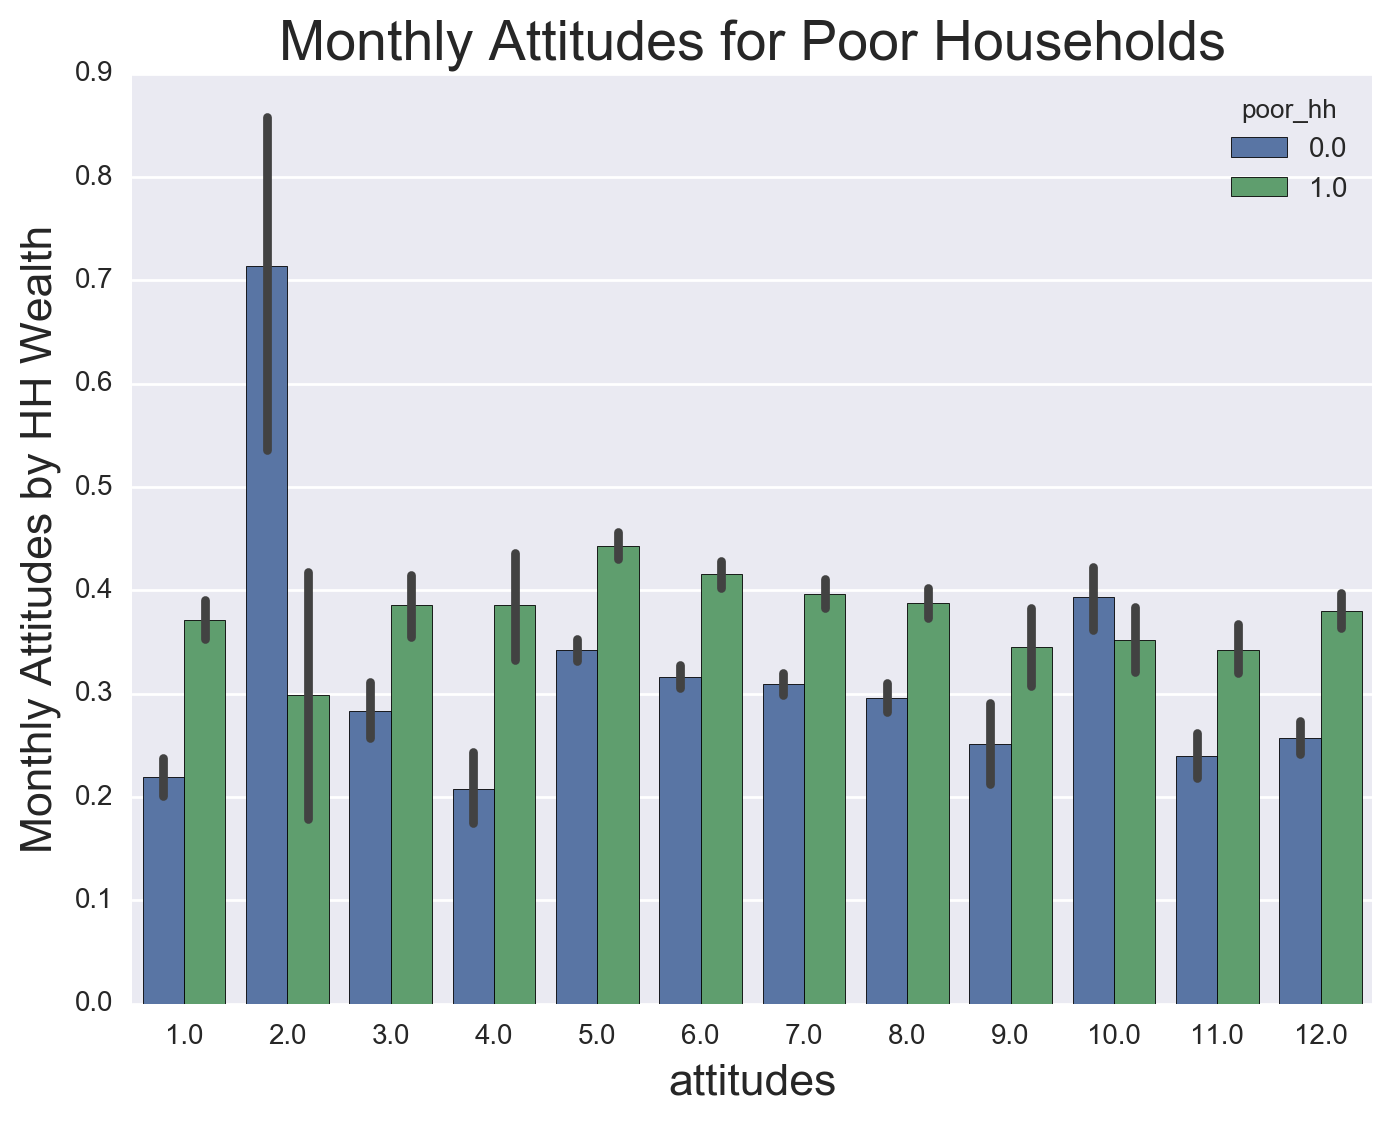

In [60]:
barplots_cat('month','violence_justified','poor_hh',DHS,'attitudes','Monthly Attitudes by HH Wealth', 'Monthly Attitudes for Poor Households')

In [70]:
def line_graph(x,y,title,xlabel,ylabel):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    sns.pointplot(x=x, y=y, data=DHS, ax=ax);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=20)
    
def line_graph_cat(x,y,cat, title,xlabel,ylabel):
    fig = plt.figure(figsize=(8,6))
    ax = fig.gca()
    sns.pointplot(x=x, y=y, hue=cat, data=DHS, ax=ax);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_title(title, fontsize=20)




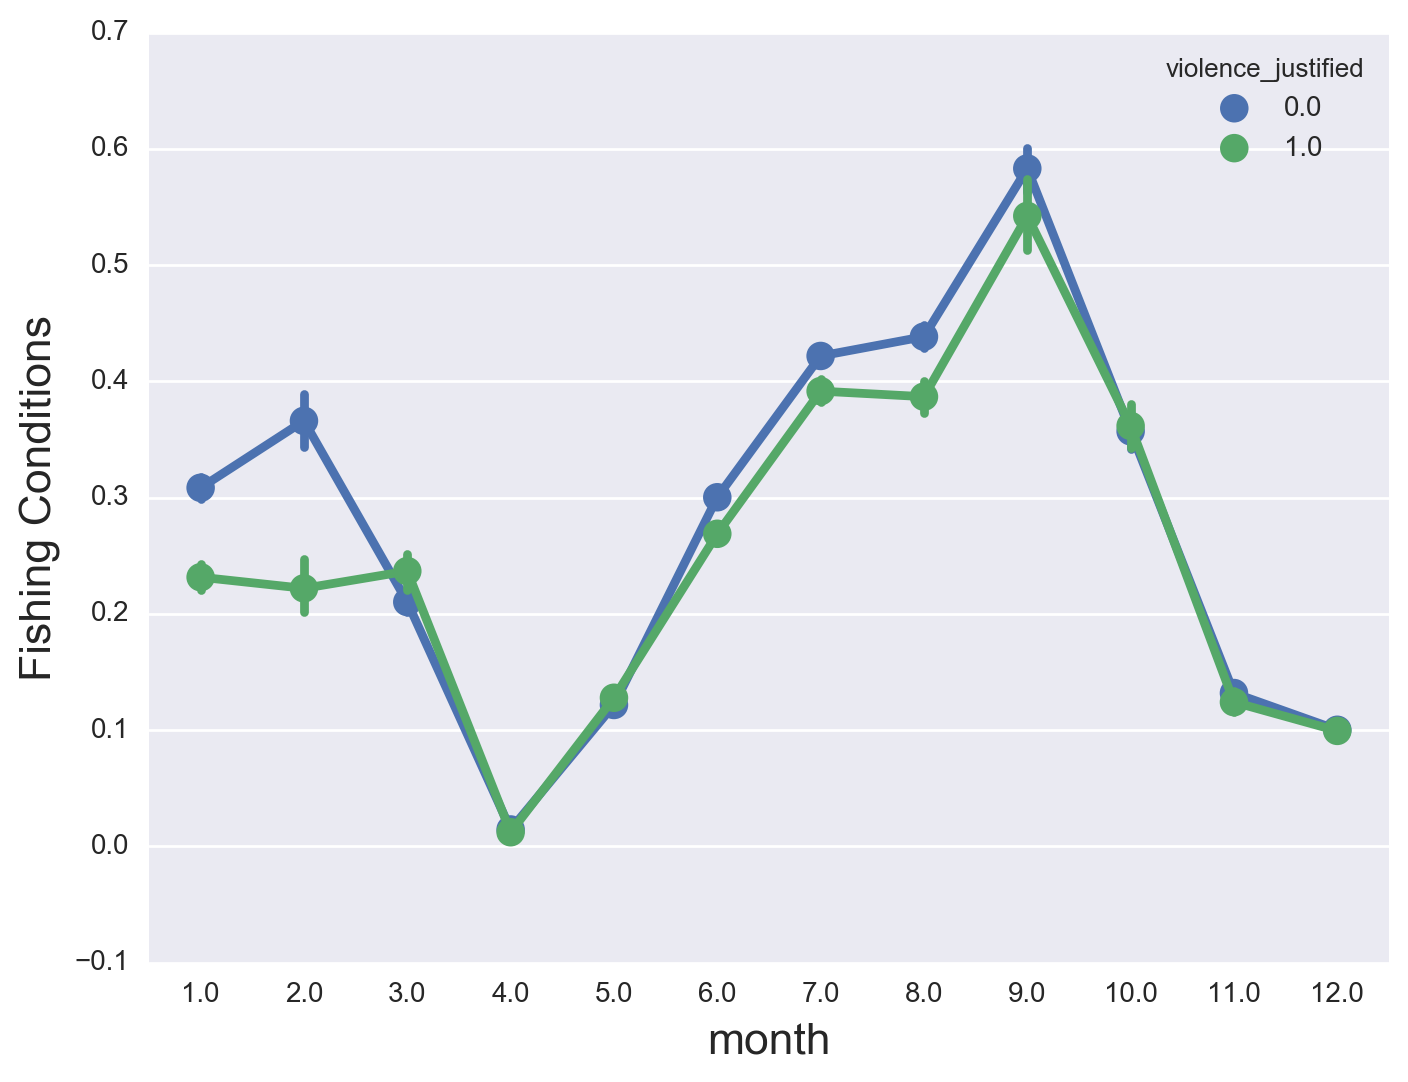

In [77]:
line_graph_cat("month", "fishshare50","violence_justified", "","month", "Fishing Conditions")


#sns.pointplot(x="month", y="fishshare50",hue='violence_justified',data=DHS);



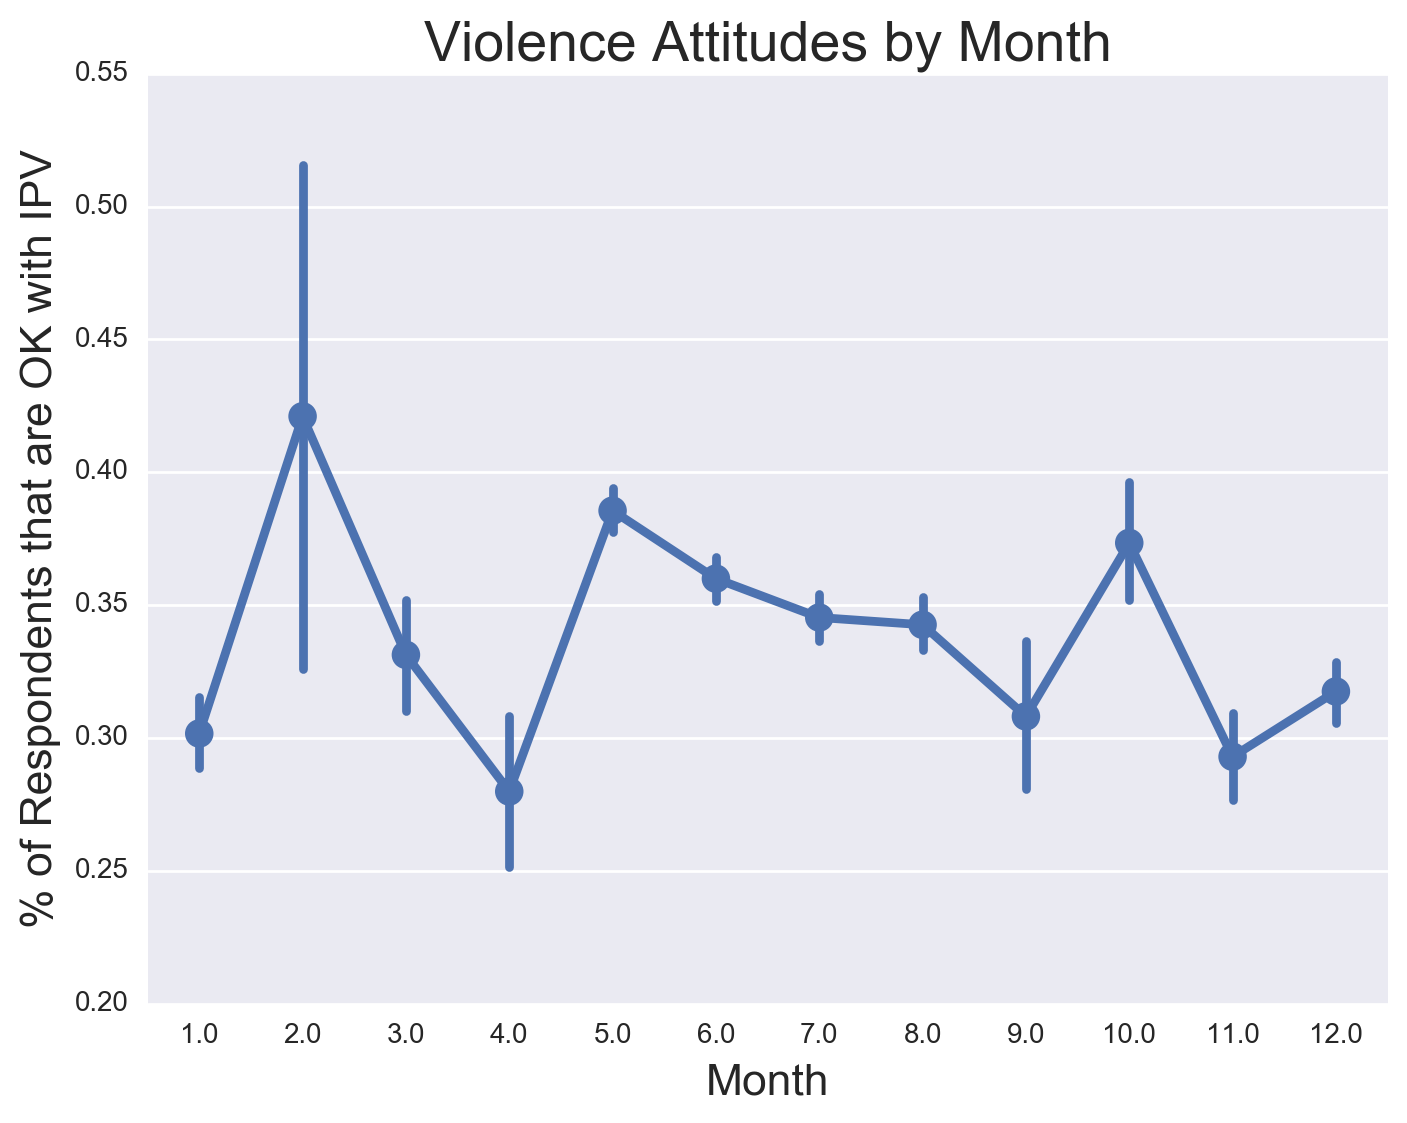

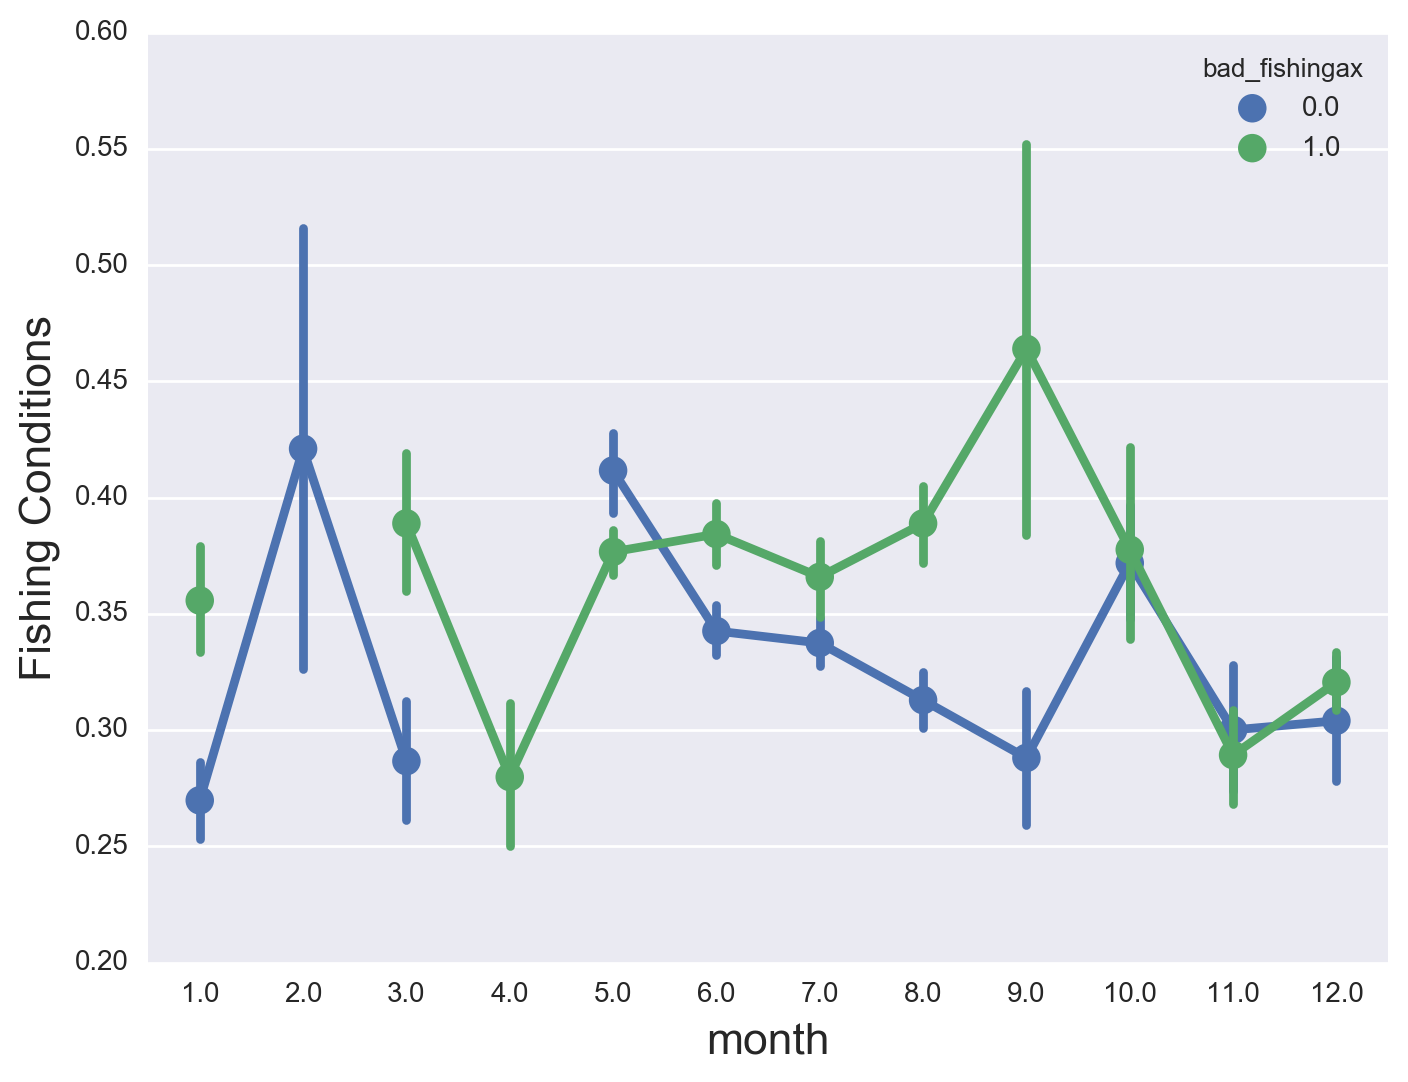

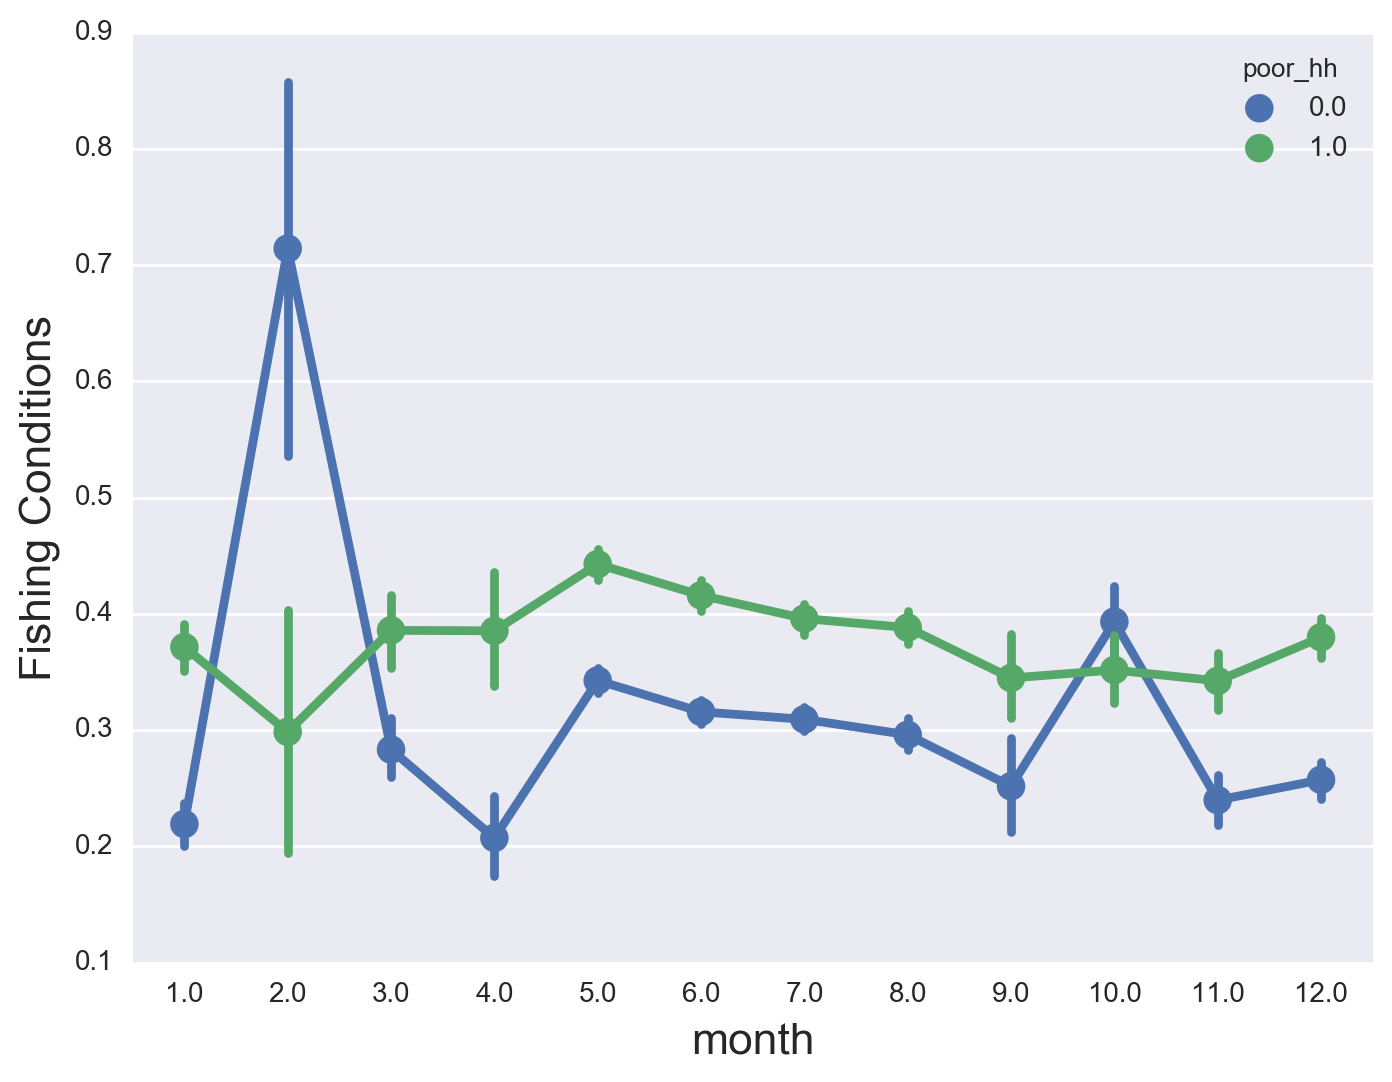

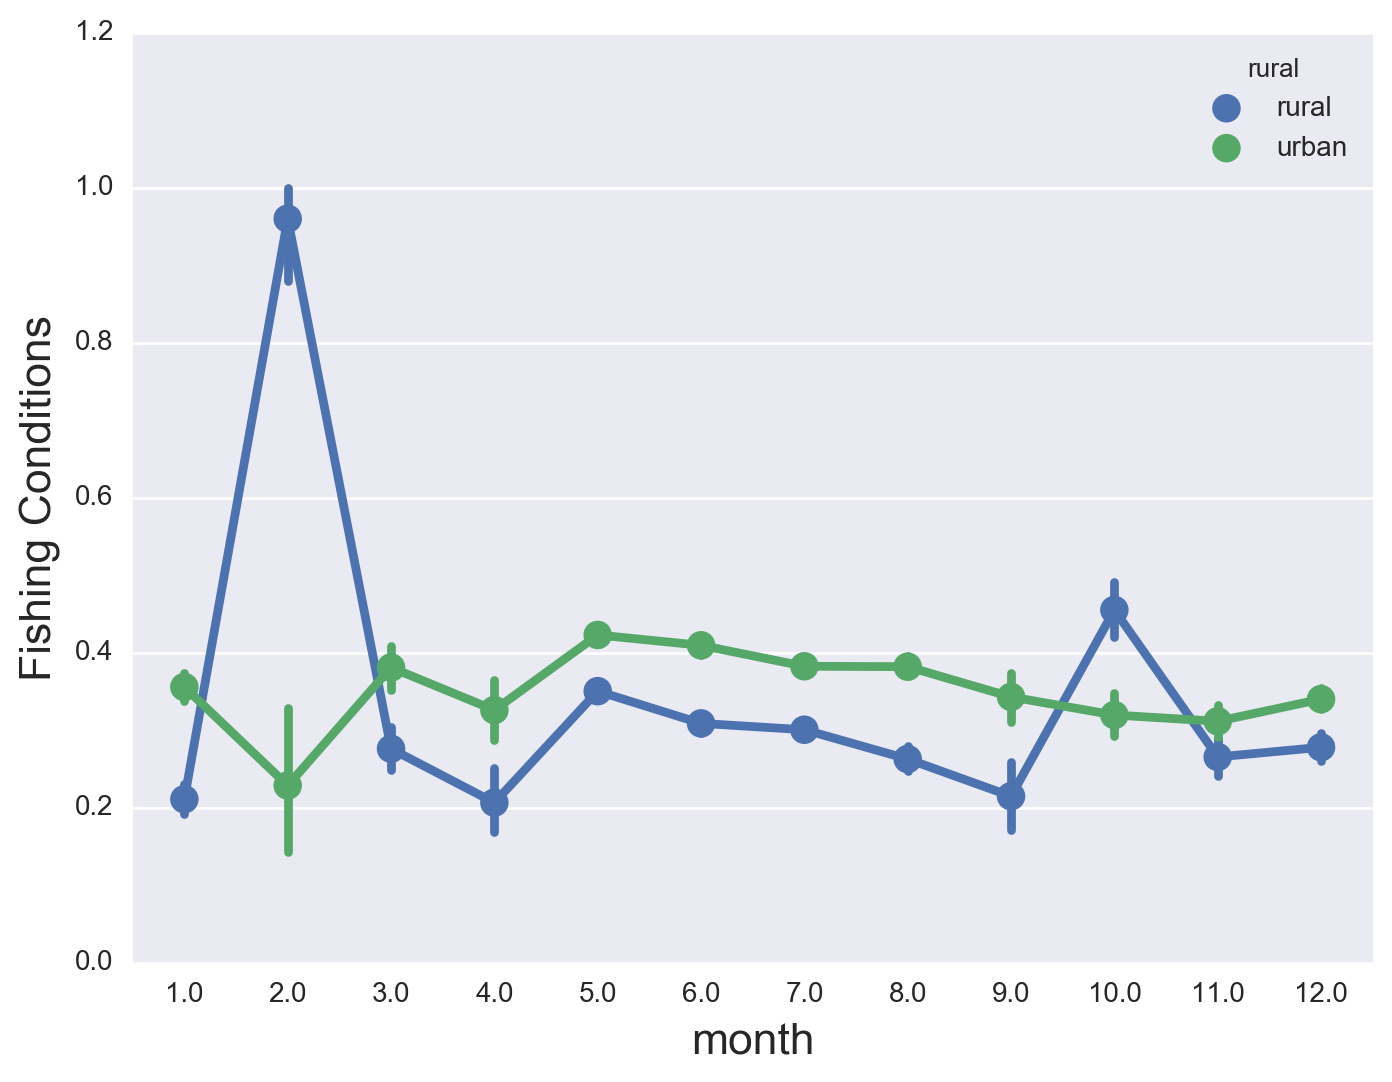

In [103]:
line_graph('month','violence_justified','Violence Attitudes by Month','Month','% of Respondents that are OK with IPV')
#sns.pointplot(x="month", y="violence_justified",data=DHS);

line_graph_cat("month", "violence_justified","bad_fishingax", "","month", "Fishing Conditions")
line_graph_cat("month", "violence_justified","poor_hh", "","month", "Fishing Conditions")
line_graph_cat("month", "violence_justified","rural", "","month", "Fishing Conditions")








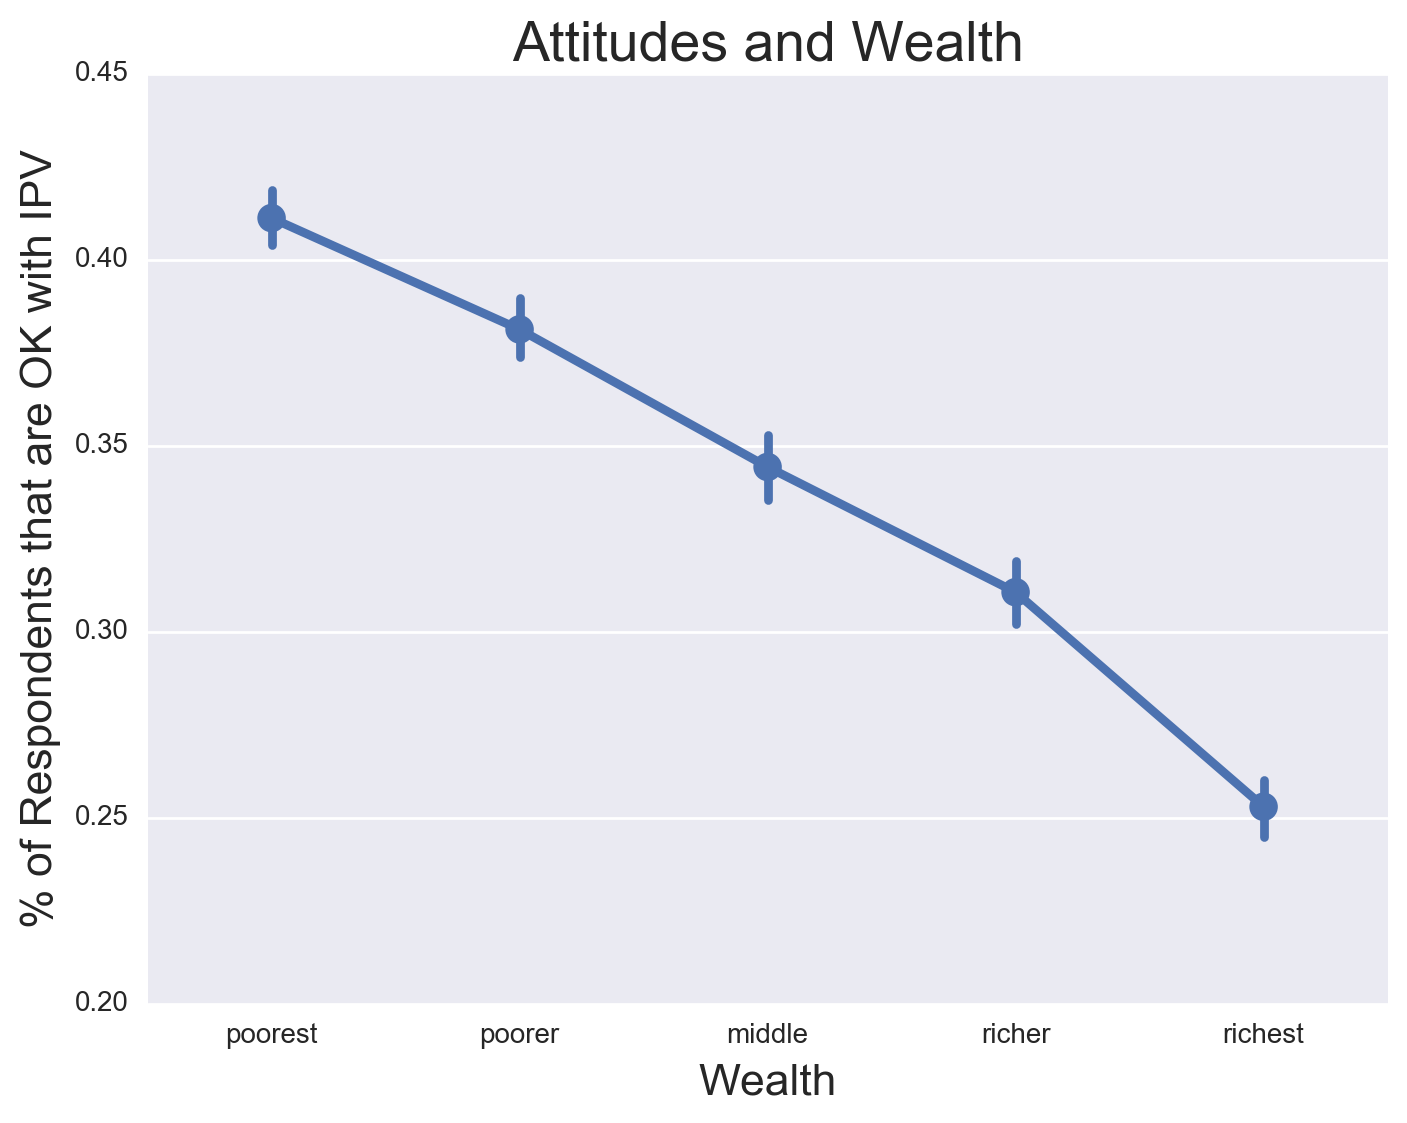

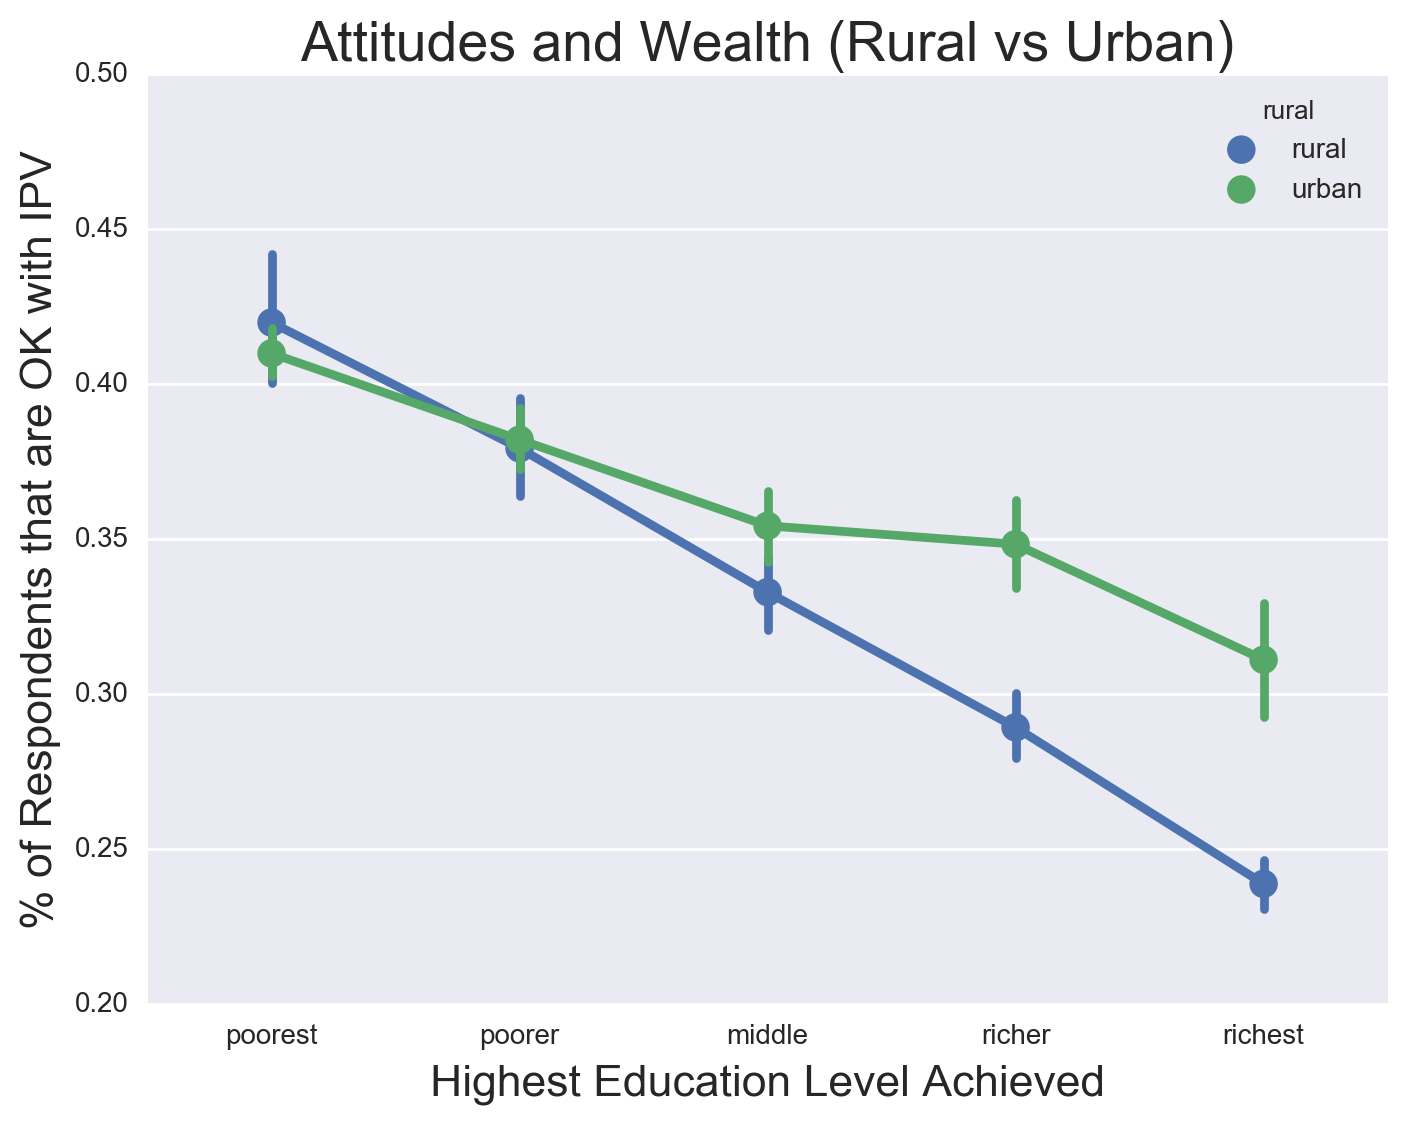

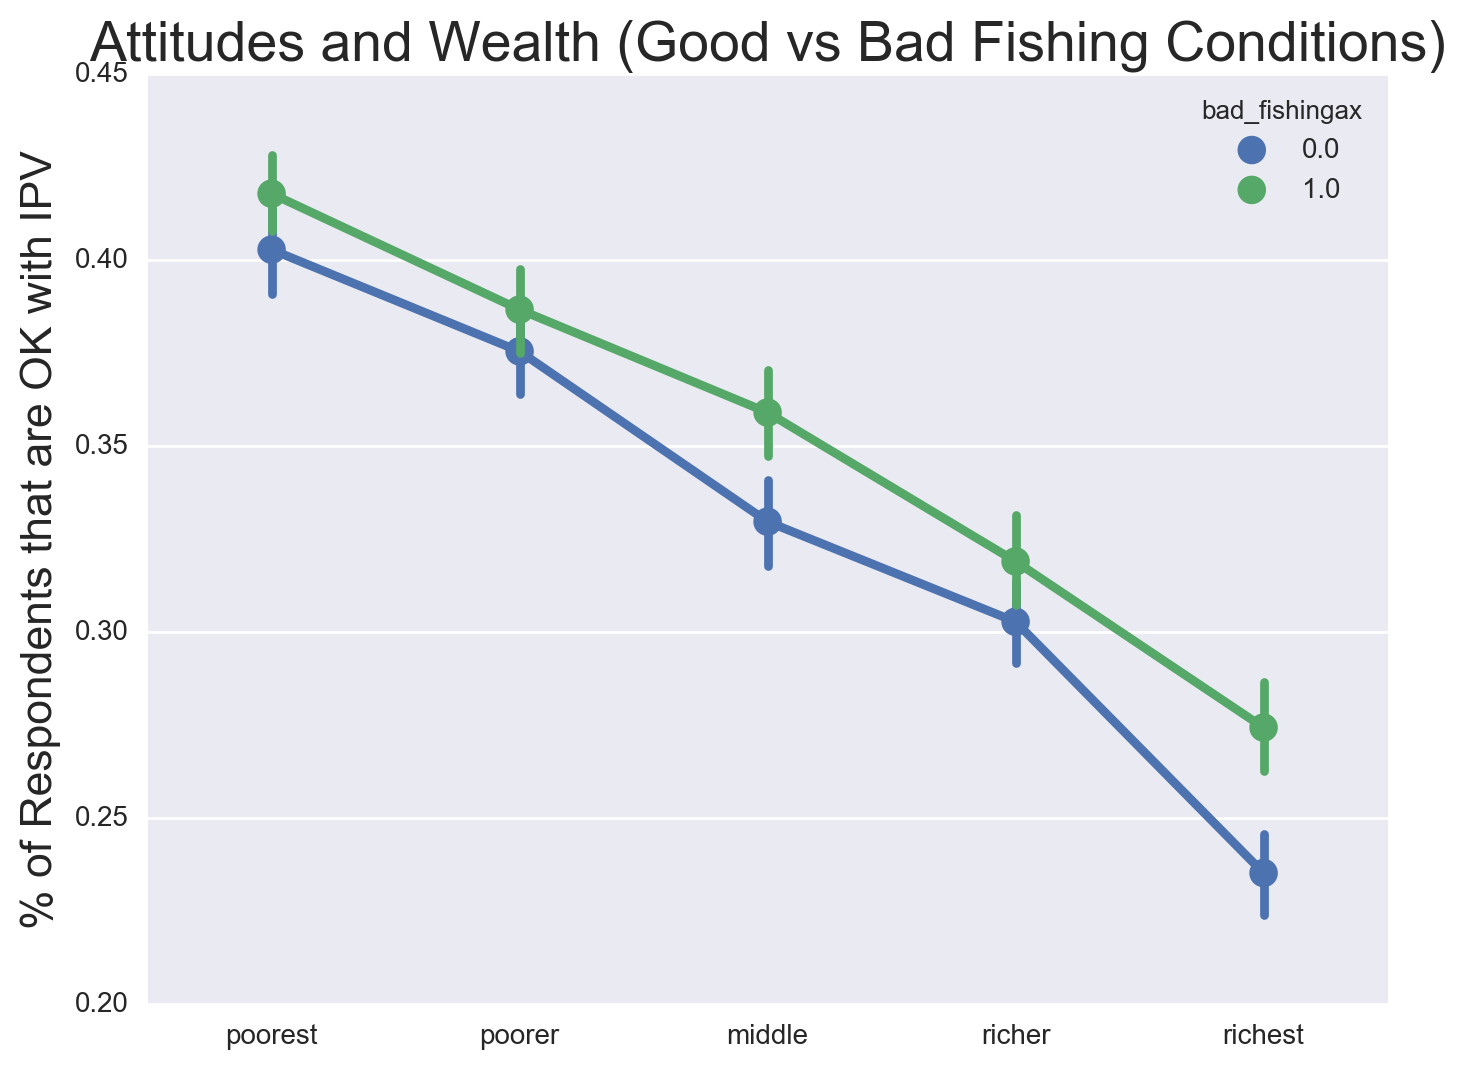

In [100]:
#sns.pointplot(x="wealth", y="violence_justified", hue='rural',data=DHS);
line_graph('wealth','violence_justified','Attitudes and Wealth' ,'Wealth','% of Respondents that are OK with IPV' )
line_graph_cat('wealth','violence_justified','rural','Attitudes and Wealth (Rural vs Urban)','Highest Education Level Achieved','% of Respondents that are OK with IPV' )
line_graph_cat('wealth','violence_justified','bad_fishingax','Attitudes and Wealth (Good vs Bad Fishing Conditions)','','% of Respondents that are OK with IPV' )

# line_graph_cat('education_level','violence_justified','bad_fishingax','Attitudes and Education Level(Good vs Bad Fishing Conditions)','Highest Education Level Achieved','% of Respondents that are OK with IPV' )
# line_graph_cat('education_level','violence_justified','rural','Attitudes and Education Level (Rural vs Urban)','education_level','% of Respondents that are OK with IPV' )
# line_graph_cat('education_level','violence_justified','poor_hh','Attitudes and Education Level (Poor Households)','education_level','% of Respondents that are OK with IPV' )






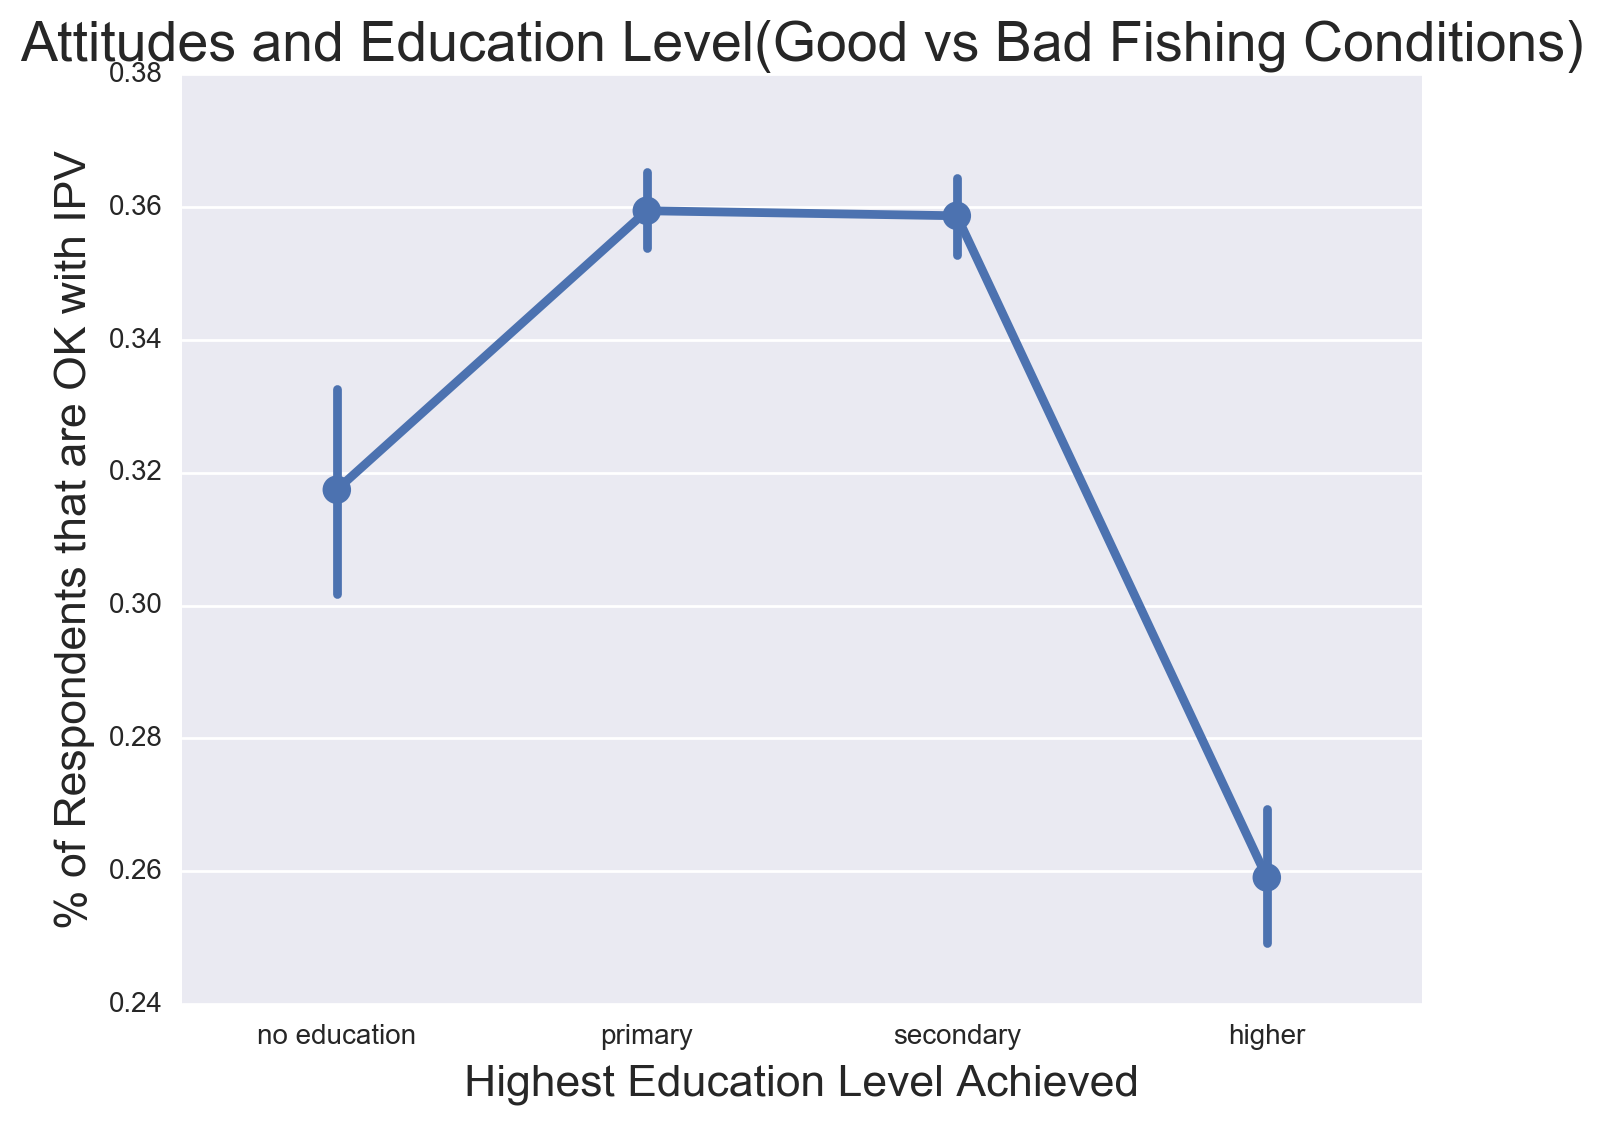

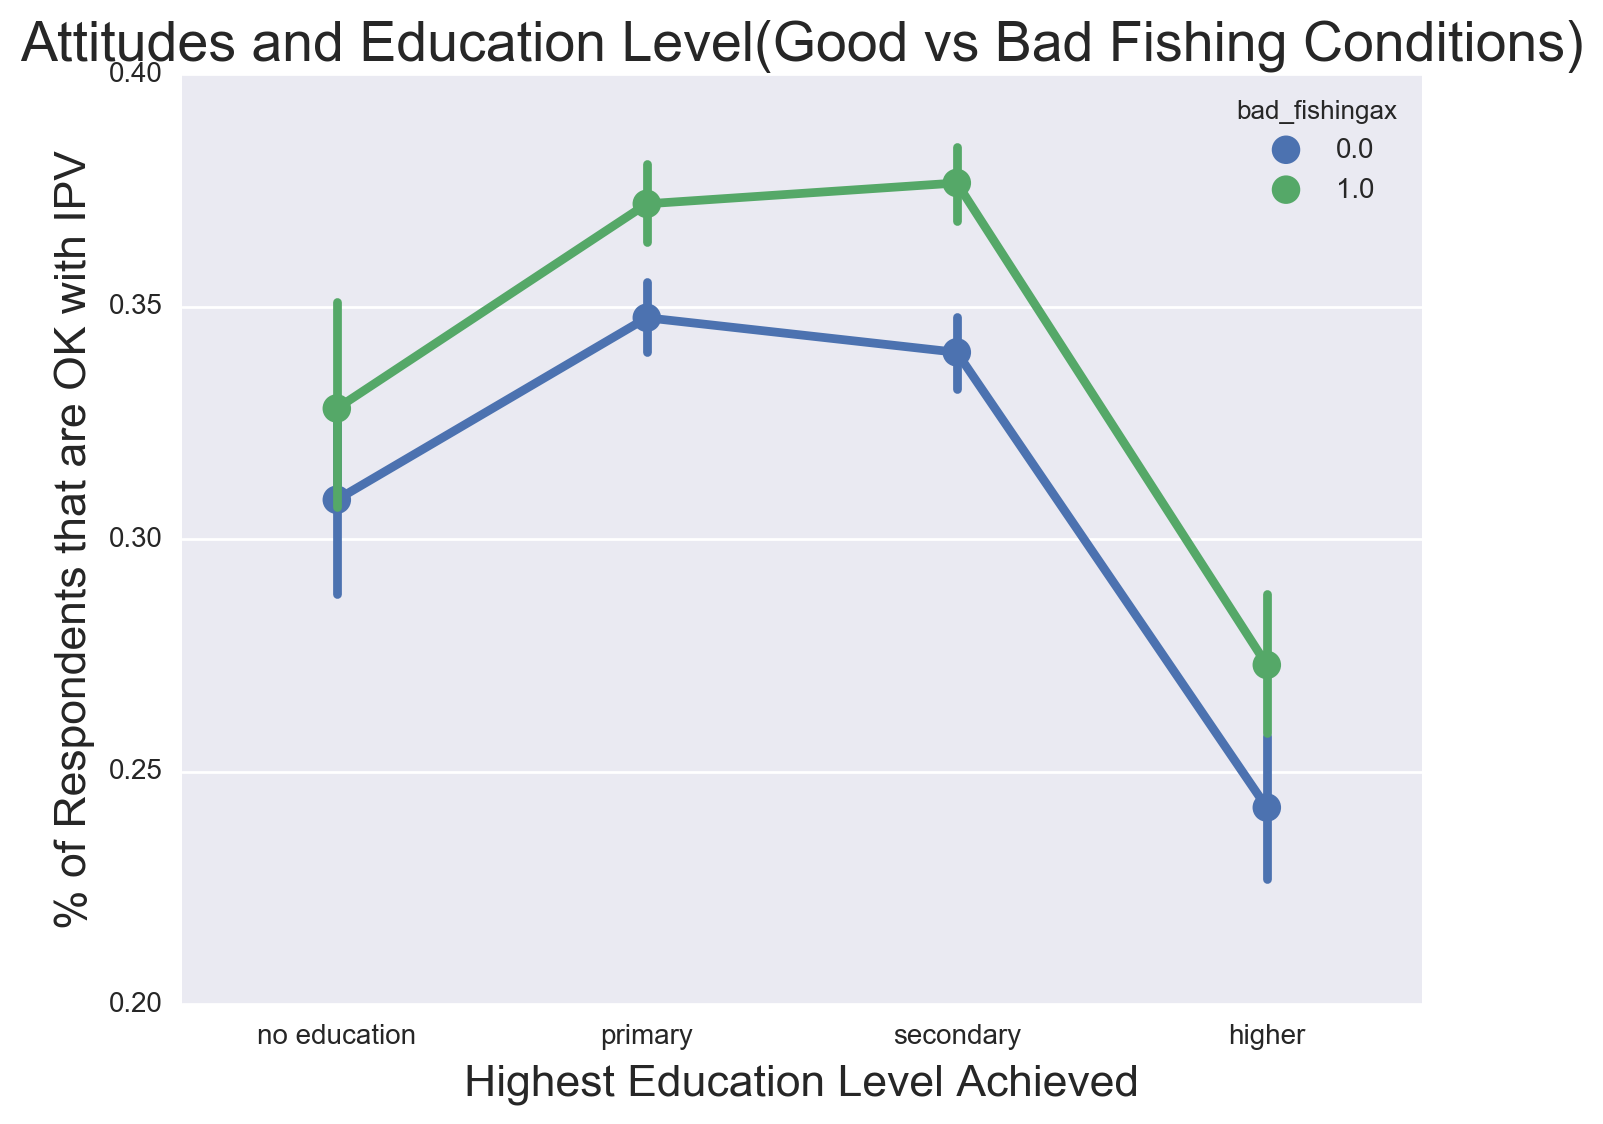

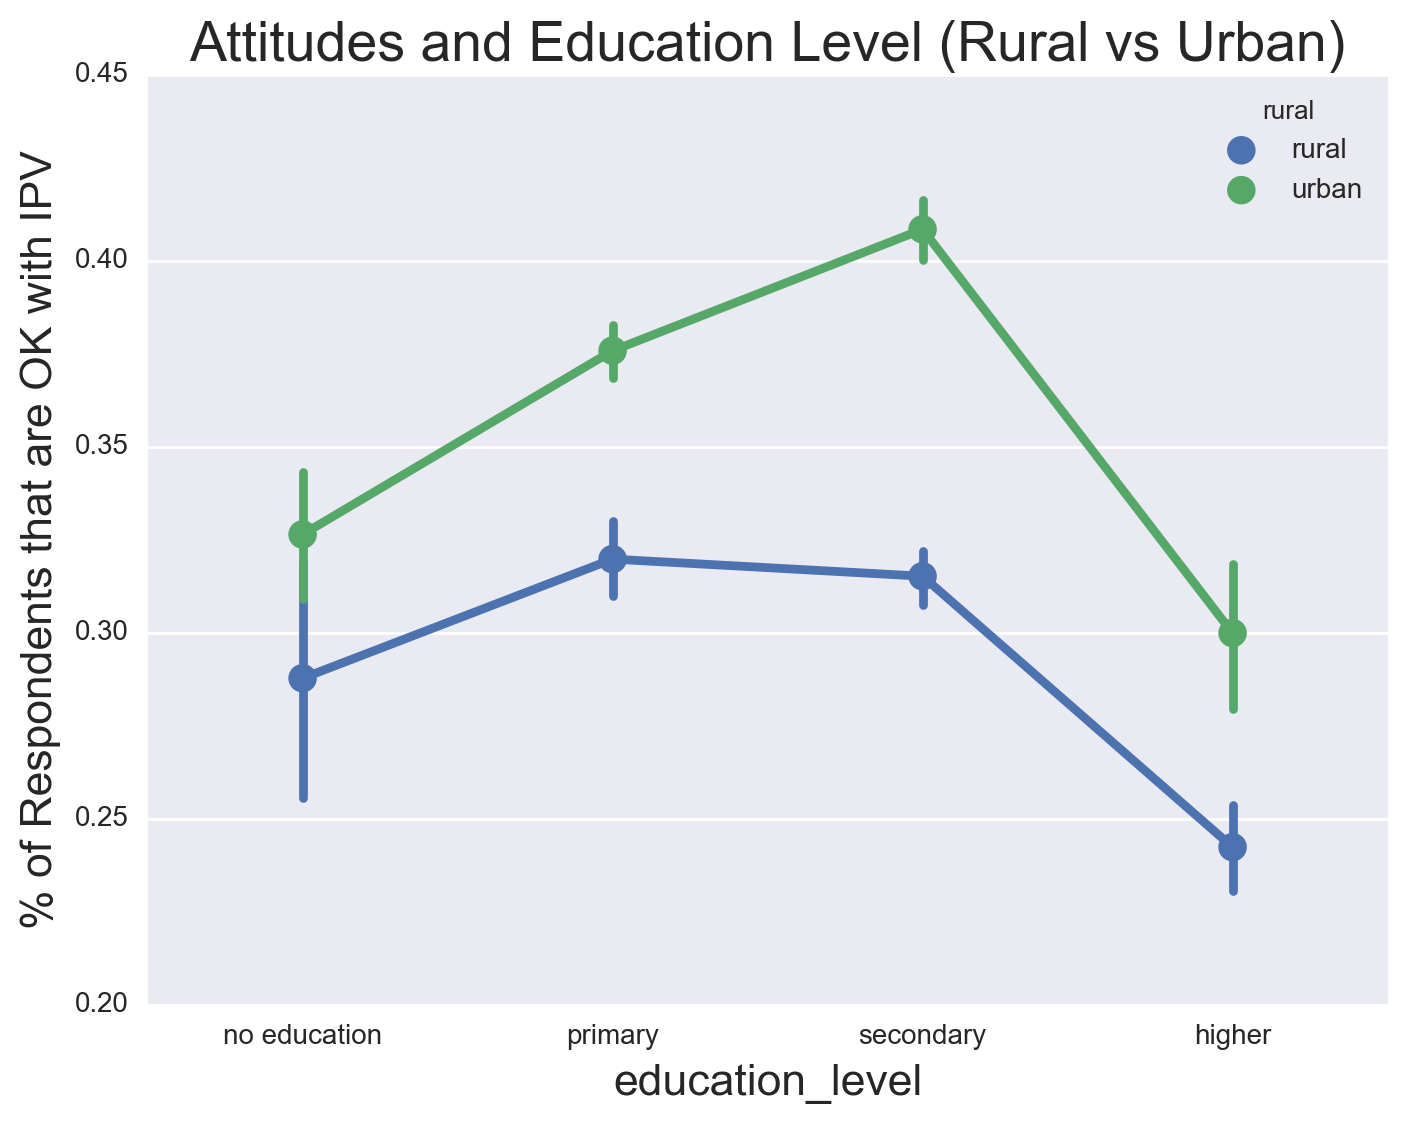

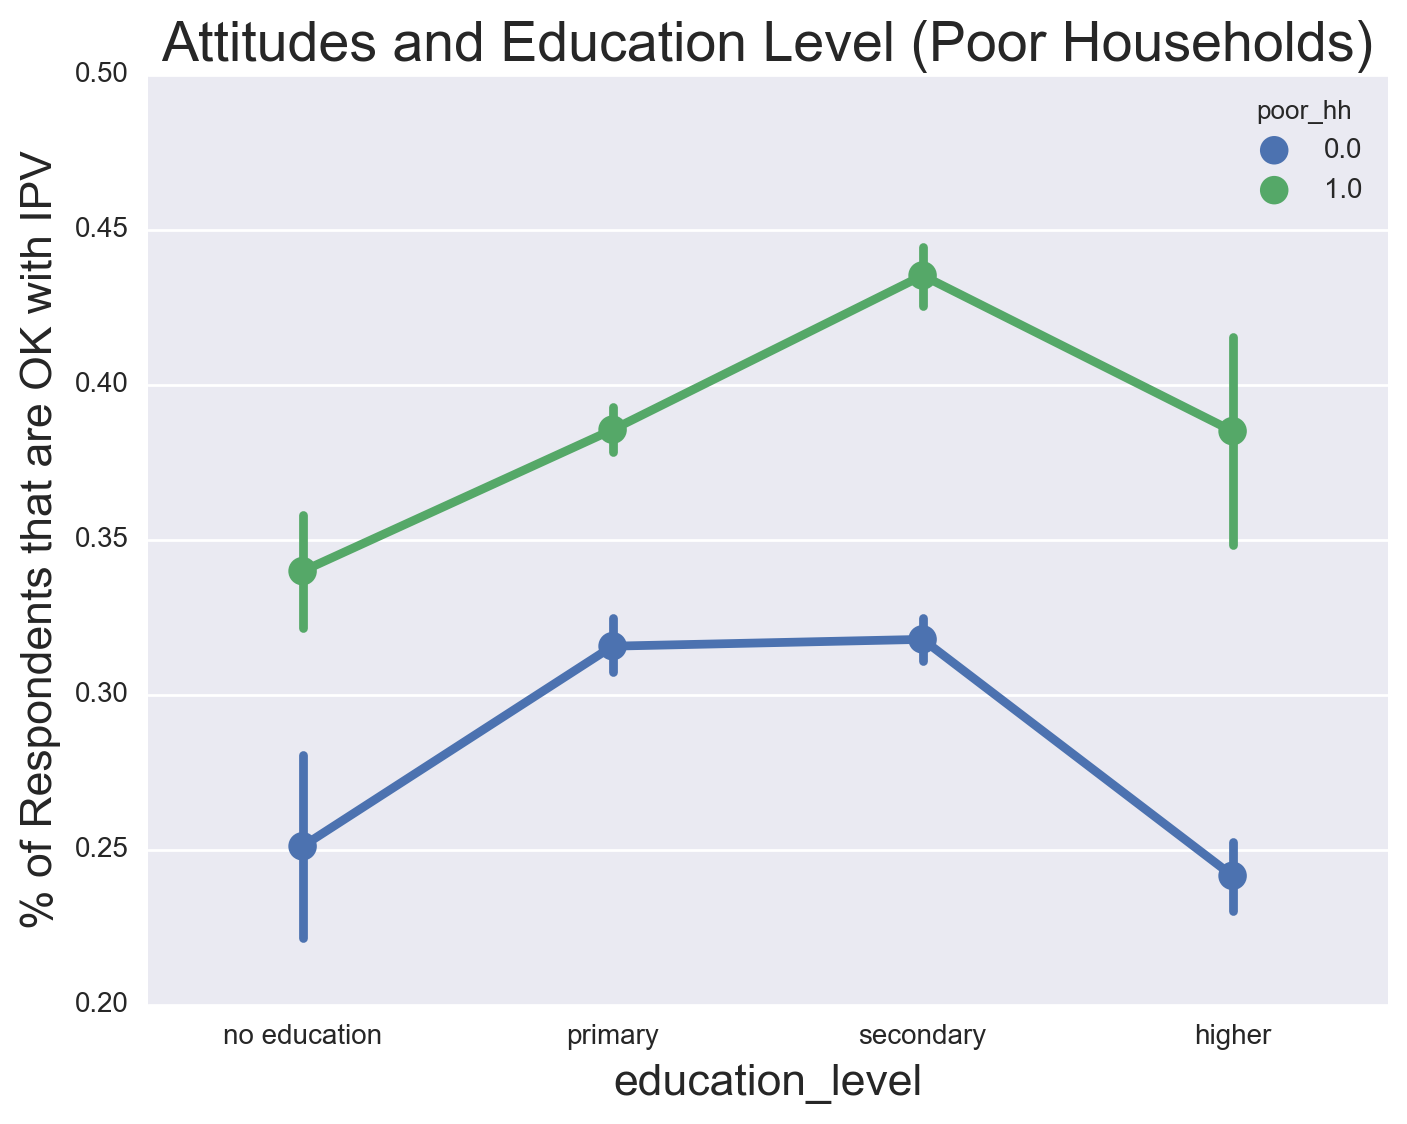

In [102]:
line_graph('education_level','violence_justified','Attitudes and Education Level(Good vs Bad Fishing Conditions)','Highest Education Level Achieved','% of Respondents that are OK with IPV' )
line_graph_cat('education_level','violence_justified','bad_fishingax','Attitudes and Education Level(Good vs Bad Fishing Conditions)','Highest Education Level Achieved','% of Respondents that are OK with IPV' )
line_graph_cat('education_level','violence_justified','rural','Attitudes and Education Level (Rural vs Urban)','education_level','% of Respondents that are OK with IPV' )
line_graph_cat('education_level','violence_justified','poor_hh','Attitudes and Education Level (Poor Households)','education_level','% of Respondents that are OK with IPV' )



## Project 1
Interesting Points

1.) There is heterogeneity in fishing conditions across provinces, which means that my model should include province level fixed effects. Otherwise, there will be omitted variable bias associated with those time-invariant characteristics that would explain systematic differences in fishing conditions across provinces. These might include geography, and climate. There is also seasonality which means that month fixed effects should be included to capture this seasonality, especially if this corresponds with other climatic variables that could effect the outcome variable, such as seasonal monsoons that could affect crop yields and change intra-household dynamics that way.

2.) When the outcome variable is broken down by the individual components, we see that the sample average for "goes without telling", and "neglects children" is considerably higher than the other reasons. Also, from the correlation matrix we see that the attitudes are highly correlated with each other which indicates that it is likely that respondents are ok with IPV in more than one situation.

3.) Surprisingly there is little correlation between the attitudes variables and decision making power in the houseshold. This is surprising because you would expect them to be endogenous. Positive attitudes towards IPV could affect control over resources, but control over resources (and thus more bargaining power) should also affect whether that respondent is ok with IPV. There is also no correlation between any of these variables and fishing conditions, but this is likely confounded without fixed effects.

4.) Attitudes, here defined as the % of women who state that it is ok if a husband beats their wife in at least one situation, decreases with household wealth (as defined by the DHS). There is also heterogeneity between rural and urban households. Poor-rural households have higher average acceptance, but  richer-urban households have starkly higher acceptance. Also, when there are bad fishing conditions, there are higher acceptance at all levels of wealth.

5.) Attitudes and education have a peculiar relationship. This variable is the highest level of education achieved. It shows that there actually a higher level of acceptance than no education at all. This is even the case with secondary school. If the respondent's highest level of education is higher education, then there is a stark decrease in acceptance of IPV. 

